# Машинное обучение, DS-поток
## Задание ML.3


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание**

* Задача 1 &mdash; 60 баллов;
* Задача 2 &mdash; 60 баллов;
* Задача 3 &mdash; 120 баллов.

<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 2</font></b>
  * <b><font color="#f09000" size="3">Решение с нуля</font></b>

* <b><font size="4">Задача 3</font></b>
  * <b><font color="#00b565" size="3">Поправил код</font></b>

*Примечание*
* <b><font color="#00b565">#00b565 &mdash; цвет для исправления замечаний</font></b>
* <b><font color="#f09000">#f09000 &mdash; цвет для решений с нуля</font></b>
* проверяющий может иначе классифицировать эти два типа дорешек<

In [1]:
# Bot check

# HW_ID: ds_ml3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

*Если у вас новая версия `sklearn` и импорт `load_boston` в ячейке ниже выдает ошибку, скачайте этот датасет так, как написано в тексте ошибки, или же воспользуйтесь альтернативным более объемным датасетом `fetch_california_housing`.*

In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
from sklearn.metrics import make_scorer, get_scorer, accuracy_score, f1_score, r2_score, precision_score, recall_score, precision_recall_curve, roc_curve, auc 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_wine
# from sklearn.datasets import load_boston  # см. комментарий выше
def load_boston():
    raw_df = pd.read_csv("http://lib.stat.cmu.edu/datasets/boston", sep="\s+", skiprows=22, header=None)
    return np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]), raw_df.values[1::2, 2]  # X,y
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

**При возникновении затруднений, которые не получается решить самостоятельно за разумное время, спрашивайте вопросы в чате. Вам обязательно постараются помочь. Успехов с решением!**

---
### Задача 1

Рассмотрим датасет для классификации вина на три класса по 13 вещественным признакам. Датасет состоит из 178 объектов. В данной задаче, используя этот датасет, вы научитесь пользоваться кросс-валидацией и подбирать оптимальные гиперпараметры модели.

In [3]:
print(load_wine()['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

Загрузим сами данные

In [4]:
X, y = load_wine(return_X_y=True)
X.shape, y.shape

((178, 13), (178,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # отделим тест, на котором будем сравнивать качество
X_train.shape, X_test.shape

((142, 13), (36, 13))

**1.** Используя одну из стратегий кросс-валидации подберите оптимальные параметры обучения решающего дерева &mdash; `max_depth` (от 1 до 14) и `min_samples_split`, а также оптимальный критерий (достаточно рассмотреть критерий Джини и энтропийный). В качестве метрик используйте Accuracy и F1 с микро и макро усреднением. В данной задаче можно пользоваться готовой реализацией дерева.

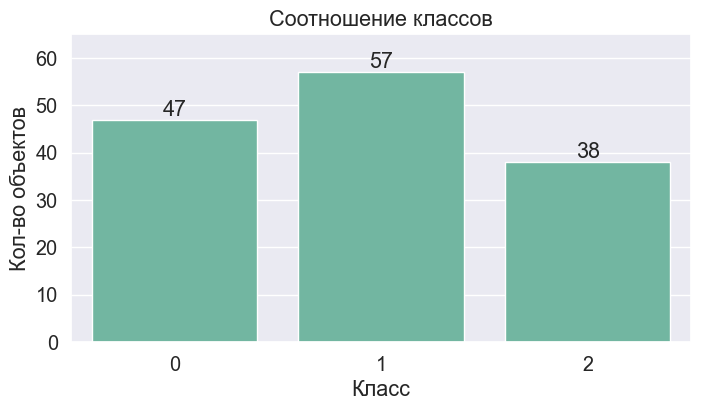

In [6]:
cnt = pd.DataFrame(y_train).value_counts().reset_index().rename(columns={0:'class'})
plt.figure(figsize=(8,4))
ax = sns.barplot(cnt, x='class', y='count')
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim((0,65))
plt.title('Соотношение классов')
plt.xlabel('Класс')
plt.ylabel('Кол-во объектов')
plt.show()

*Подберем стратегию кросс-валидации. По графику видно, что:*  
*а) выборка мала (в исходном датасете всего 178 элементов) $\Rightarrow$ можем позволить себе стратегии с большой вычислительной сложностью (если понадобится)*  
*б) классы заметно отличаются по численности $\Rightarrow$ нужна стратегия со стратификацией*  
*в) в данных не должно быть групп $\Rightarrow$ групповая стратегия не нужна*  
*Указанным требованиям соответстует, например, Stratified Shuffle Split*

In [7]:
gridsearch = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state=42),
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': np.arange(1,15),
        'min_samples_split': np.arange(2,10)},
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'f1_macro': make_scorer(f1_score, average='macro'),  # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
        'f1_micro': make_scorer(f1_score, average='micro')
    },
    refit='f1_macro'
)
gridsearch.fit(X_train, y_train)  # важно: scaler для деревьев не нужен
results = pd.DataFrame(gridsearch.cv_results_)

In [8]:
print("Лучшие параметры:")
for k,v in gridsearch.best_params_.items():
    print(f'{k}: {v}')

print("\nЛучшие метрики на тесте:")
print(f"Accuracy: {results.loc[gridsearch.best_index_, 'mean_test_accuracy']:.3f}")
print(f"F1_macro: {results.loc[gridsearch.best_index_, 'mean_test_f1_macro']:.3f}")
print(f"F1_micro: {results.loc[gridsearch.best_index_, 'mean_test_f1_micro']:.3f}")

Лучшие параметры:
criterion: entropy
max_depth: 4
min_samples_split: 2

Лучшие метрики на тесте:
Accuracy: 0.924
F1_macro: 0.925
F1_micro: 0.924


Постройте графики зависимости метрик от максимальной глубины дерева для каждого критерия на train и на test. Значение `min_samples_split` фиксируйте.

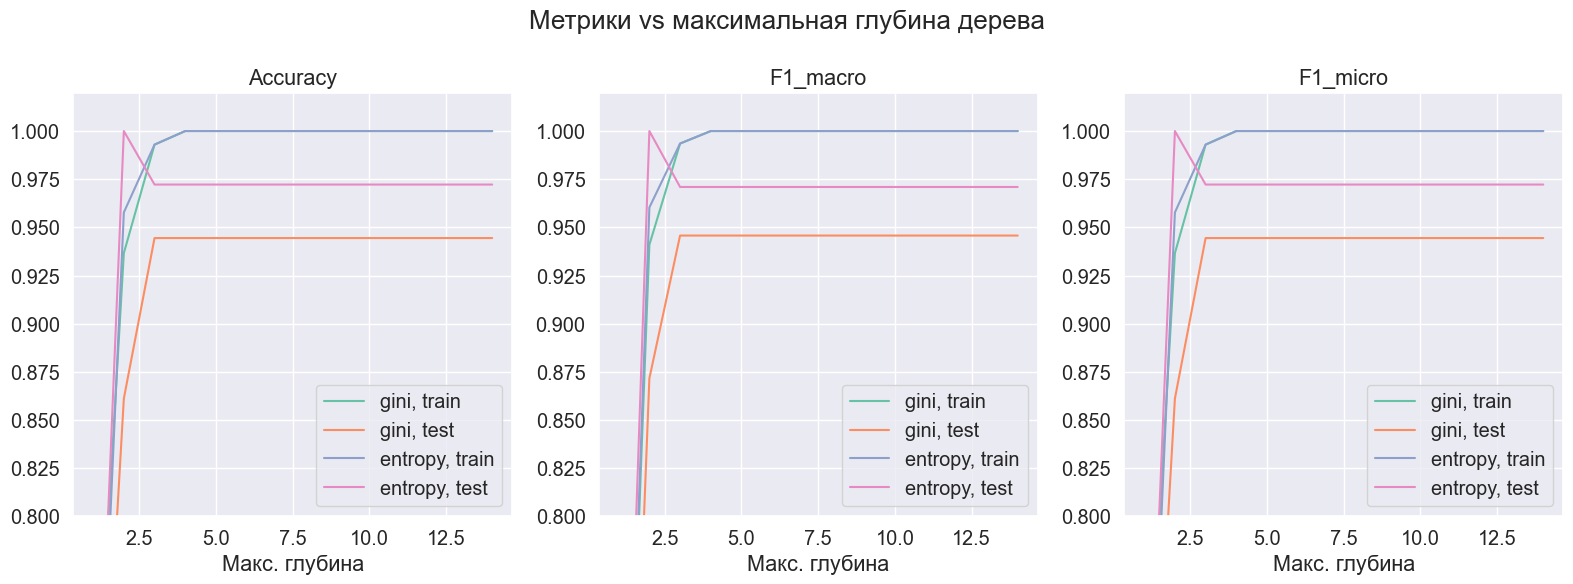

In [9]:
accuracies = {'gini':{'train':[],'test':[]}, 'entropy':{'train':[],'test':[]}}
f1_macros = {'gini':{'train':[],'test':[]}, 'entropy':{'train':[],'test':[]}}
f1_micros = {'gini':{'train':[],'test':[]}, 'entropy':{'train':[],'test':[]}}
depths = np.arange(1,15)
for criterion in ['gini','entropy']:
    for depth in depths:
        dt = DecisionTreeClassifier(criterion=criterion, min_samples_split=2, max_depth=depth, random_state=42)
        dt.fit(X_train, y_train)
        for domain, X_domain, y_domain in zip(['train','test'], [X_train,X_test], [y_train,y_test]):
            y_pred = dt.predict(X_domain)
            accuracies[criterion][domain].append(accuracy_score(y_domain, y_pred))
            f1_macros[criterion][domain].append(f1_score(y_domain, y_pred, average='macro'))
            f1_micros[criterion][domain].append(f1_score(y_domain, y_pred, average='micro'))

fig, axs = plt.subplots(1, 3, figsize=(16,6))
fig.suptitle('Метрики vs максимальная глубина дерева')
for ax, metrics, title in zip(axs.flatten(), [accuracies,f1_macros,f1_micros], ['Accuracy','F1_macro','F1_micro']):
    ax.set_title(title)
    ax.set_xlabel('Макс. глубина')
    ax.set_ylim((0.8,1.02))
    for k1 in ['gini','entropy']:
        for k2 in ['train','test']:
            sns.lineplot(x=depths, y=metrics[k1][k2], label=f'{k1}, {k2}', ax=ax)
fig.tight_layout()
plt.show()

*Видно, почему критерий entropy оптимальный: с ним все метрики на тесте повыше. Качество на трейне выше, чем на тесте, причем метрики на трейне близки к идеальным (что особенно заметно для глубоких деревьев), т.е. модель немного переобучилась. Но в целом, качество на тесте получается довольно высокое, начиная с max_depth $>$ 3 (как нашли выше, оптимальное значение этого параметра $=4$)*

**2.** Подберите коэффициент регуляризации для логистической регрессии и постройте аналогичные графики. Какая из двух моделей лучше?

In [10]:
gridsearch = GridSearchCV(
    estimator = LogisticRegression(random_state=42),
    param_grid = {
        'C': np.logspace(-5,0.5,100)},
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'f1_macro': make_scorer(f1_score, average='macro'),
        'f1_micro': make_scorer(f1_score, average='micro')
    },
    refit='f1_macro'
)
scaler = StandardScaler()  # важно: в лог.рег. с регуляризацией уже нужен scaler
scaler.fit(X_train)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)
gridsearch.fit(X_train_scaled, y_train)
results = pd.DataFrame(gridsearch.cv_results_)

In [11]:
print("Лучшие параметры:")
for k,v in gridsearch.best_params_.items():
    print(f'{k}: {v:.3f}')

print("\nЛучшие метрики на тесте:")
print(f"Accuracy: {results.loc[gridsearch.best_index_, 'mean_test_accuracy']:.3f}")
print(f"F1_macro: {results.loc[gridsearch.best_index_, 'mean_test_f1_macro']:.3f}")
print(f"F1_micro: {results.loc[gridsearch.best_index_, 'mean_test_f1_micro']:.3f}")

Лучшие параметры:
C: 0.022

Лучшие метрики на тесте:
Accuracy: 0.993
F1_macro: 0.993
F1_micro: 0.993


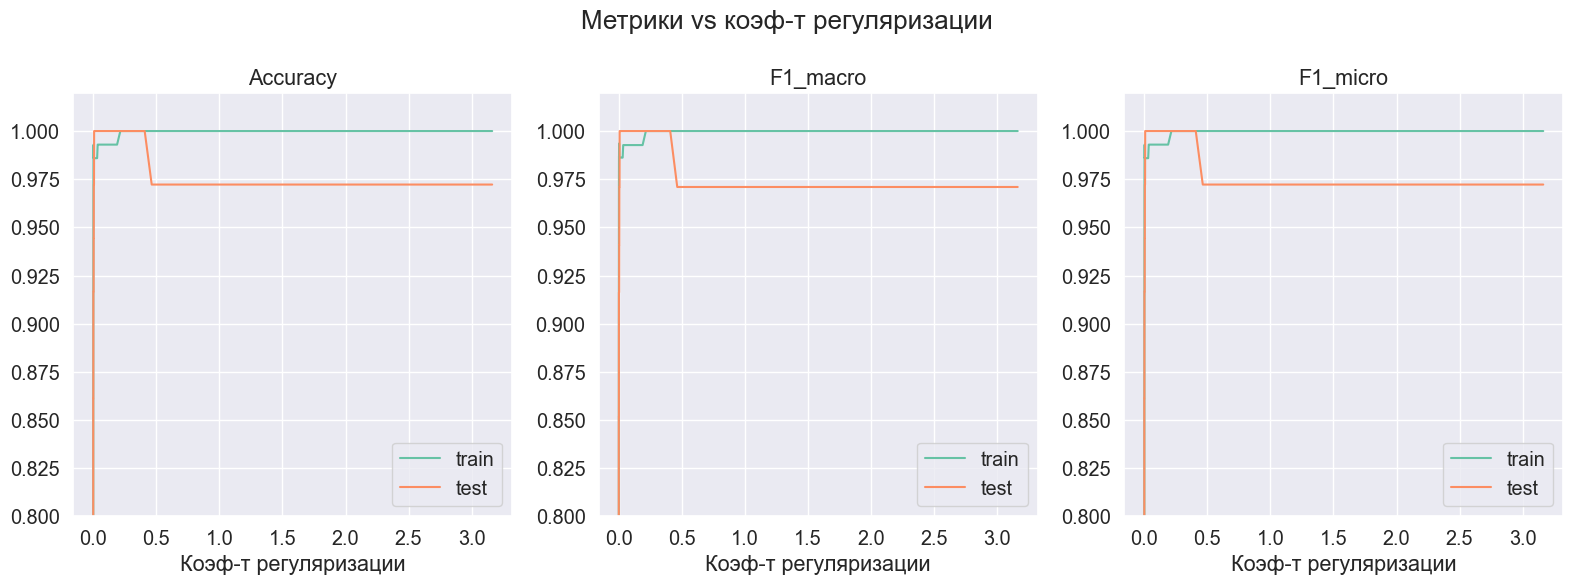

In [12]:
accuracies = {'train':[],'test':[]}
f1_macros = {'train':[],'test':[]}
f1_micros = {'train':[],'test':[]}
Cs = np.logspace(-5,0.5,100)
for C in Cs:
    lr = LogisticRegression(C=C, random_state=42)
    lr.fit(X_train_scaled, y_train)
    for domain, X_domain, y_domain in zip(['train','test'], [X_train_scaled,X_test_scaled], [y_train,y_test]):
        y_pred = lr.predict(X_domain)
        accuracies[domain].append(accuracy_score(y_domain, y_pred))
        f1_macros[domain].append(f1_score(y_domain, y_pred, average='macro'))
        f1_micros[domain].append(f1_score(y_domain, y_pred, average='micro'))

fig, axs = plt.subplots(1, 3, figsize=(16,6))
fig.suptitle('Метрики vs коэф-т регуляризации')
for ax, metrics, title in zip(axs.flatten(), [accuracies,f1_macros,f1_micros], ['Accuracy','F1_macro','F1_micro']):
    ax.set_title(title)
    ax.set_xlabel('Коэф-т регуляризации')
    ax.set_ylim((0.8,1.02))
    for k2 in ['train','test']:
        sns.lineplot(x=Cs, y=metrics[k2], label=f'{k2}', ax=ax)
fig.tight_layout()
plt.show()

*Судя по метрикам на тесте, логистическая регрессия справилась лучше. При этом все равно наблюдается аналогичная картина небольшого переобучения*

**3.** Предположим, что мы не различаем классы 1 и 2. Объедините эти два класса и посмотрите на полученное соотношение классов.

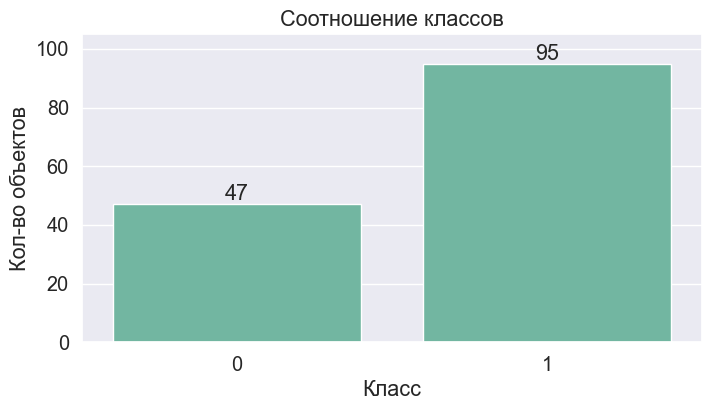

In [13]:
y_train, y_test = (y_train>0).astype(int), (y_test>0).astype(int)  # мерджим классы 1 и 2

cnt = pd.DataFrame(y_train).value_counts().reset_index().rename(columns={0:'class'})
plt.figure(figsize=(8,4))
ax = sns.barplot(cnt, x='class', y='count')
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim((0,105))
plt.title('Соотношение классов')
plt.xlabel('Класс')
plt.ylabel('Кол-во объектов')
plt.show()

*Дисбаланс классов усилился: теперь численности классов отличаются вдвое*

Подберите параметры с помощью кросс-валидации для лучшего типа модели (логистическая регрессия, решающее дерево) из первой части задачи. В рамках кросс-валидации посчитайте также метрики Precision и Recall. Как изменились оптимальные параметры?

*Подбираем для логистической регрессии*

In [14]:
gridsearch = GridSearchCV(
    estimator = LogisticRegression(random_state=42),
    param_grid = {
        'C': np.logspace(-5,0,100)},
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'f1_macro': make_scorer(f1_score, average='macro'),
        'f1_micro': make_scorer(f1_score, average='micro'),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score)
    },
    refit='f1_macro'
)
scaler = StandardScaler()  # важно: в лог.рег. с регуляризацией уже нужен scaler
scaler.fit(X_train)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)
gridsearch.fit(X_train_scaled, y_train)
results = pd.DataFrame(gridsearch.cv_results_)

In [15]:
print("Лучшие параметры:")
for k,v in gridsearch.best_params_.items():
    print(f'{k}: {v:.3f}')

print("\nЛучшие метрики на тесте:")
print(f"Accuracy: {results.loc[gridsearch.best_index_, 'mean_test_accuracy']:.3f}")
print(f"F1_macro: {results.loc[gridsearch.best_index_, 'mean_test_f1_macro']:.3f}")
print(f"F1_micro: {results.loc[gridsearch.best_index_, 'mean_test_f1_micro']:.3f}")
print(f"precision: {results.loc[gridsearch.best_index_, 'mean_test_precision']:.3f}")
print(f"recall: {results.loc[gridsearch.best_index_, 'mean_test_recall']:.3f}")

Лучшие параметры:
C: 0.351

Лучшие метрики на тесте:
Accuracy: 0.979
F1_macro: 0.977
F1_micro: 0.979
precision: 0.980
recall: 0.989


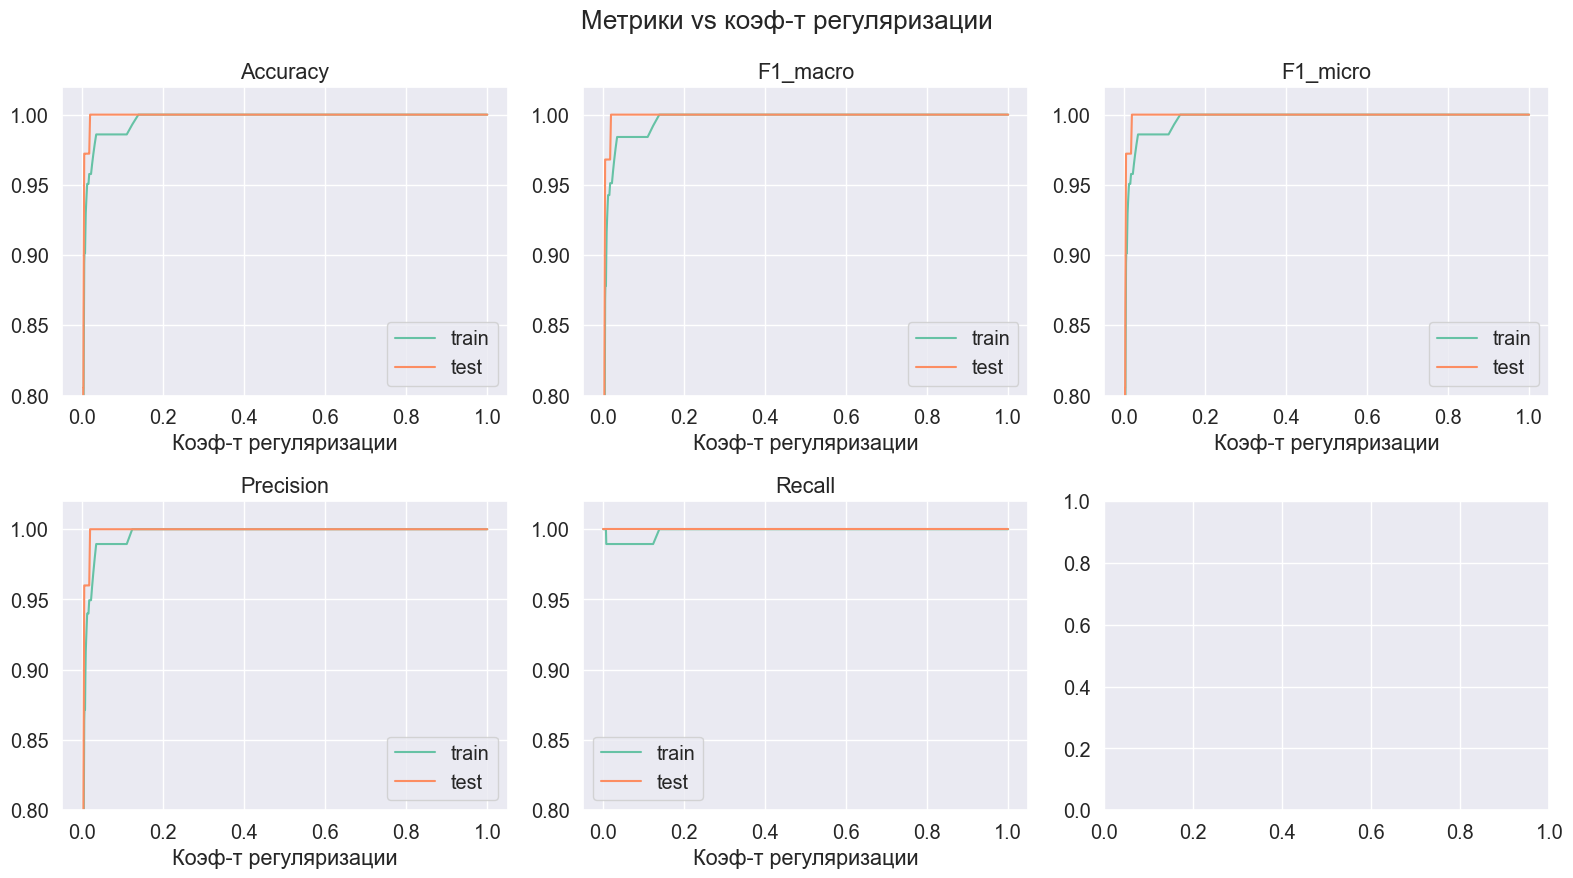

In [16]:
accuracies = {'train':[],'test':[]}
f1_macros = {'train':[],'test':[]}
f1_micros = {'train':[],'test':[]}
precisions = {'train':[],'test':[]}
recalls = {'train':[],'test':[]}
Cs = np.logspace(-5,0,100)
for C in Cs:
    lr = LogisticRegression(C=C, random_state=42)
    lr.fit(X_train_scaled, y_train)
    for domain, X_domain, y_domain in zip(['train','test'], [X_train_scaled,X_test_scaled], [y_train,y_test]):
        y_pred = lr.predict(X_domain)
        accuracies[domain].append(accuracy_score(y_domain, y_pred))
        f1_macros[domain].append(f1_score(y_domain, y_pred, average='macro'))
        f1_micros[domain].append(f1_score(y_domain, y_pred, average='micro'))
        precisions[domain].append(precision_score(y_domain, y_pred))
        recalls[domain].append(recall_score(y_domain, y_pred))

fig, axs = plt.subplots(2, 3, figsize=(16,9))
fig.suptitle('Метрики vs коэф-т регуляризации')
for ax, metrics, title in zip(axs.flatten(), [accuracies,f1_macros,f1_micros,precisions,recalls], ['Accuracy','F1_macro','F1_micro','Precision','Recall']):
    ax.set_title(title)
    ax.set_xlabel('Коэф-т регуляризации')
    ax.set_ylim((0.8,1.02))
    for k2 in ['train','test']:
        sns.lineplot(x=Cs, y=metrics[k2], label=f'{k2}', ax=ax)
fig.tight_layout()
plt.show()

Постройти графики ROC и PR кривых для модели с подобранными гиперпараметрами. Какой вывод можно сделать?

In [17]:
model = LogisticRegression(C=0.351, random_state=42)  # C - оптимальное
model.fit(X_train_scaled, y_train)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

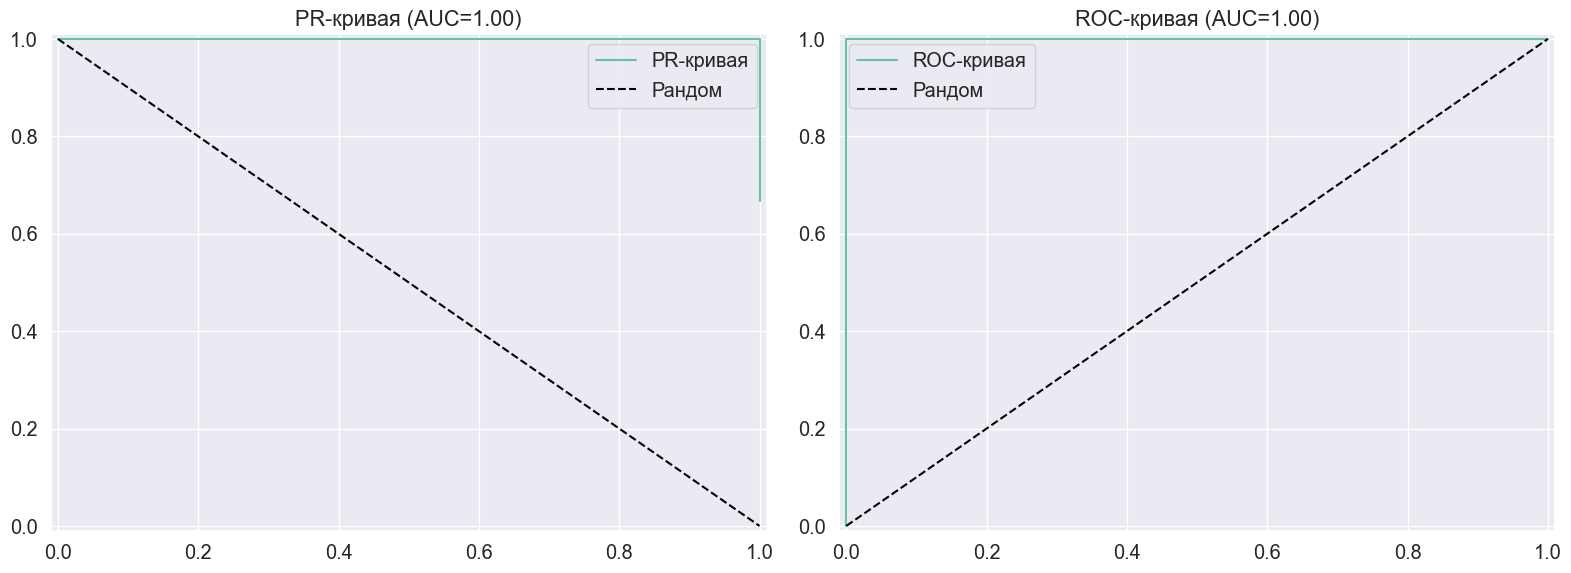

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
ax[0].set_title(f'PR-кривая (AUC={auc(recall, precision):.2f})')
ax[0].plot(recall, precision, label='PR-кривая')
ax[0].plot([0, 1], [1, 0], 'k--', label='Рандом')
ax[0].set_xlim([-0.01, 1.01])
ax[0].set_ylim([-0.01, 1.01])
ax[0].legend()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
ax[1].set_title(f'ROC-кривая (AUC={auc(recall, precision):.2f})')
ax[1].plot(fpr, tpr, label='ROC-кривая')
ax[1].plot([0, 1], [0, 1], 'k--', label='Рандом')
ax[1].set_xlim([-0.01, 1.01])
ax[1].set_ylim([-0.01, 1.01])
ax[1].legend()

fig.tight_layout()
plt.show()

*Обе кривые расположены выше диагонали, соответствующей рандомной классификации. Более того, площади под обоими графиками округляются к 1. Значит, модель хорошо справляется с задачей*  

Выберите два порога, посчитайте для них метрики бинарной классификации и придумайте по одной ситутации, где один порог лучше другого.

In [19]:
metrics = {0.1:[],0.9:[]}
for th in metrics.keys():
    metrics[th].extend(f(y_test, y_pred_proba>th) for f in [accuracy_score, precision_score, recall_score])  # ограничимся этими тремя
pd.DataFrame({'Метрика':['accuracy','precision','recall'], 'th=0.1':metrics[0.1], 'th=0.9':metrics[0.9]}).set_index('Метрика').T

Метрика,accuracy,precision,recall
th=0.1,0.972222,0.96,1.000
th=0.9,0.916667,1.00,0.875


*Для наглядности, я взял две крайности: пороги 0.1 и 0.9. Видно, что с порогом 0.1 recall равен 1 (т.е. мы нашли всех представителей класса в выборке), а с порогом 0.9 precision равен 1 (т.е. из элементов, которые модель посчитала классом 1, действительно все из класса 1). В текущей задаче это не так принципиально, но приведу примеры других задач, где смещенный порог (который приоритизирует recall или precision) окажется полезен.*  
 - *Если задача - например, выявить заразное заболевание, то крайне важен recall. Модель с порогом 0.1 просто будет гиперчуствительна к маркерам заболевания. Поэтому в худшем случае модель отправит здорового человека на обследование (но главное, что не упустит по-настоящему больных)*   
 - *Если задача - например, понять, можно ли человеку выдать кредит, то крайне важен precision. Модель с порогом 0.9 просто будет перестраховываться и не выдавать кредит в сомнительных\пограничных кейсах. Поэтому в худшем случае модель не выдаст кредит кому-то надежному (но главное, что не выдаст много невозвратных кредитов, которые принесли бы убытки)*

---
### Задача 2

Рассмотрим модель с наилучшими гиперпараметрами из предыдущей задачи для бинарной классификации. Исследуем свойства различных подходов валидации. В качестве метрики используйте F1-метрику.

Выполните не менее 100 следующих итераций.
1. Перемешайте исходные данные.
2. Выполните подход с однократным разбиением:
    * разделите перемешанные даннные на обучающую и валидационную выборку,
    * обучите модель на обучающей выборке,
    * посчитайте качество модели на валидационной выборке и сохраните это значение.
3. Выполните KFold-валидацию:
    * примените KFold к перемешанным даннным, выполняя разбиение на 5 фолдов,
    * посчитайте среднее и дисперсию качества моделей по фолдам и сохраните эти значение.
4. Аналогично примените ShuffleSplit-валидацию, выполнив 5 ее итераций. На каждой итерации размер валидационной части должен совпадать с тем, который был использован в KFold. Иначе говоря, нужно использовать `ShuffleSplit(n_splits=5, test_size=0.2)`.
5. Повторите пункты 2-4 для стратифицированных разбиений.

*Проверьте, что на разных итерациях у вас получаются разные значения метрик. Если одинаковые, то может быть где-то нужно отключить `random_state`. Также советуем при отладке кода делать запуски на малое количество итераций.*

<b><font color="#f09000" size="5">Решение с нуля</font></b>

In [54]:
np.random.seed(42)
X, y = load_wine(return_X_y=True)
y = (y>0).astype(int)  # мерджим классы 1 и 2

methods = {  # сразу все подходы кросс-валидации
    'train_test': ShuffleSplit(n_splits=1, test_size=0.2),
    'stratified_train_test': StratifiedShuffleSplit(n_splits=1, test_size=0.2),
    'kfold': KFold(n_splits=5),
    'stratified_kfold': StratifiedKFold(n_splits=5),
    'shuffle_split': ShuffleSplit(n_splits=5, test_size=0.2),
    'stratified_shuffle_split': StratifiedShuffleSplit(n_splits=5, test_size=0.2),
}

results = {key:[] for key in methods.keys()}
for _ in range(200):
    shuffle = np.random.permutation(X.shape[0])
    for method, cv in methods.items():
        scores = cross_val_score(
            Pipeline([('1', StandardScaler()), ('2', LogisticRegression(C=0.351, random_state=42))]), 
            X[shuffle], y[shuffle], cv=cv, scoring=get_scorer('f1'))
        results[method].append([np.mean(scores), np.var(scores)])

for method in methods:
    results[method] = np.array(results[method])
methods = sorted(list(results.keys()), key=lambda x: x.split('_')[-1])

По всем итерациям посчитайте
* выборочную дисперсию среднего качества моделей для каждого из трех подходов, тем самым оценив разброс значений метрик в каждом подходе;
* постройте kde-график среднего качества моделей;
* для подходов KFold и ShuffleSplit посчитайте выборочное среднее дисперсии качества моделей по фолдам, тем самым оценив разброс метрик между фолдами/итерациями.

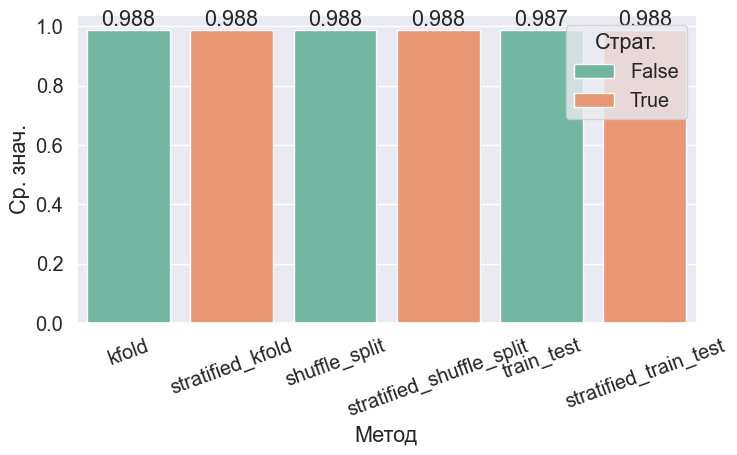

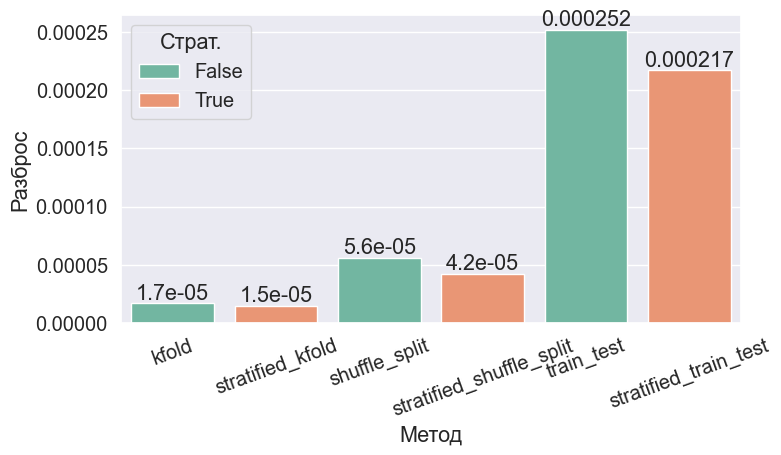

In [58]:
df = pd.DataFrame({'method': methods, 'mean': [np.mean(results[m][:,0]) for m in methods], 'var': [np.var(results[m][:,0]) for m in methods]})
df['Страт.'] = df.method.apply(lambda m: 'stratified' in m)
df['mean'], df['var'] = df['mean'].round(3), df['var'].round(6)

plt.figure(figsize=(8,4))
ax = sns.barplot(df, x='method', y='mean', hue='Страт.')
[ax.bar_label(i,) for i in ax.containers]
plt.xticks(rotation=20)
plt.xlabel('Метод')
plt.ylabel('Ср. знач.')
plt.show()

plt.figure(figsize=(8,4))
ax = sns.barplot(df, x='method', y='var', hue='Страт.')
[ax.bar_label(i,) for i in ax.containers]
plt.xticks(rotation=20)
plt.xlabel('Метод')
plt.ylabel('Разброс')
plt.show()

*Максимальный разброс - у train_test, который провел по сути всего 1 разбиение и потому подвержен шуму. В целом также видно, что стратификация немного снижает разброс. Среднее везде получилось +- одинаковым*

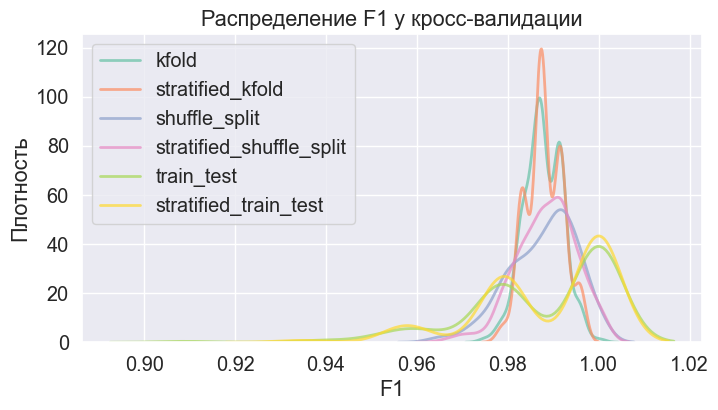

In [57]:
plt.figure(figsize=(8,4))
[sns.kdeplot(results[m][:,0], lw=2, alpha=0.7, label=m) for m in methods]
plt.title('Распределение F1 у кросс-валидации')
plt.xlabel('F1')
plt.ylabel('Плотность')
plt.legend()
plt.show()

*Подтверждаются наблюдения из предыдущей ячейки: среднее совпадает, разброс у train_test больше*

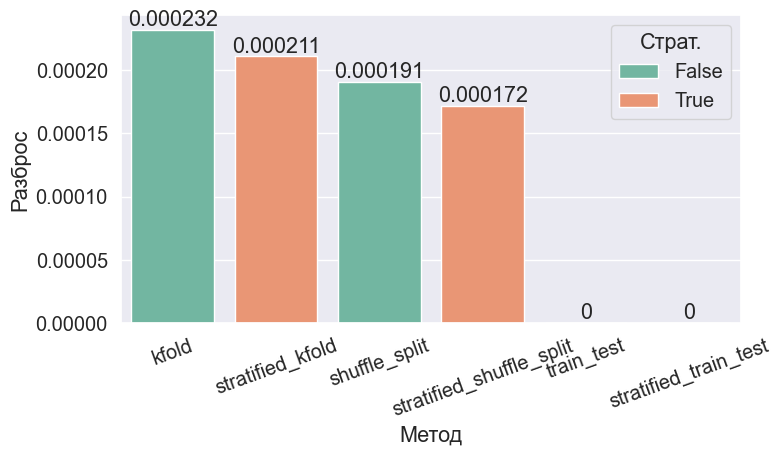

In [59]:
df = pd.DataFrame({'method': methods, 'var': [np.mean(results[m][:,1]) for m in methods]})
df['Страт.'] = df.method.apply(lambda m: 'stratified' in m)
df['var'] = df['var'].round(6)
plt.figure(figsize=(8,4))
ax = sns.barplot(df, x='method', y='var', hue='Страт.')
[ax.bar_label(i,) for i in ax.containers]
plt.xticks(rotation=20)
plt.xlabel('Метод')
plt.ylabel('Разброс')
plt.show()

*У трейн-тест нет фолдов, поэтому там 0. У kfold такой разброс чуть выше, но отличие невелико*

Сделайте выводы о свойствах подходов, их преимуществах и недостатках.

*Подход с разбиением на трейн и тест очень простой и быстрый, т.к. с ним надо обучить модель всего 1 раз, но он дает большой разброс.*  
*Остальные два подхода чуть более вычислительно затратные, т.к. надо обучать по модели на сплит, но дают меньший разброс. KFold работает чуть лучше, но честно говоря, принципиальной разницы между этими двумя подходами я не увидел.*  
*Стратификация во всех подходах немного снижает разброс*  

<b><font color="#f09000" size="5">===== Конец правок =====</font></b>

---
### Задача 3

Каждый студент DS-потока должен написать свое дерево. Что ж, время пришло...

*Советы.*
* Для отладки кода советуем строить простые деревья глубины 1-3 на простых датасетах по 10-20 объектах, печатать обучаемые параметры и т.д.. Если все хорошо работает, в финальном решении убирайте отладочный вывод.
* Сравните качество реализованного дерева с качеством реализации из sklearn. Ровно такое же качество вы можете не получить из-за различных небольших оптимизаций, но если качество отличается на порядок, стоит проверить свою реализацию.
* Сначала лучше разобраться с одной задачей (регрессией или классификацией), а затем переходить к другой.

Вспомним, как именно происходит построение решающего дерева. Для построения дерева в каждой нелистовой вершине происходит разбиение подвыборки на две части по некоторому признаку $x_j$. Этот признак и порог $t$, по которому будет происходить разбиение, мы хотим брать не произвольно, а основываясь на соображениях оптимальности.  Для этого нам необходимо знать некоторый фукционал качества, который будем оптимизировать при построении разбиения. 

Обозначим через $X_m$ — множество объектов, попавших в вершину $m$, разбиваемую на данном шаге, а через $X_\ell$ и $X_r$ — объекты, попадающие в левое и правое поддерево соответственно при заданном правиле $I\{x_j < t\}$. Пусть также $H$ — используемый критерий информативности (impurity criterion).

Выпишите функционал, который необходимо минимизировать при разбиении вершины:

***Ответ:***  $Q(X_m,j,t) = |\frac{X_l}{X_m}| \cdot H(X_l) + |\frac{X_r}{X_m}| \cdot H(X_r) \to \min\limits_{X_l,X_r: X_l \cup X_r = X_m}$

**Реализация критериев информативности.**


Вспомните еще раз, на какой общей идее основаны критерии информативности и какую характеристику выборки они стремятся оптимизировать?

***Ответ:** минимизируют разброс ответов в вершине (т.е. идея в том, чтобы разбить вершину на две - более однородные по ответам)*


Перед тем, как непосредственно работать с решающими деревьями, реализуйте функции подсчёта значения критериев разбиения вершин решающих деревьев. Использовать готовые реализации критериев или классов для решающих деревьев из `sklearn` и из других библиотек **запрещено.** Также при реализации критериев по причине неэффективности **запрещается использовать циклы**. Воспользуйтесь библиотекой `numpy`.

Каждая функция принимает на вход одномерный `numpy` — массив размерности `(n,)` из значений отклика.

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>Ошибка реализации критерия абсолютной функции потерь. Комм. Взято среднее вместо медианы. (-5.0)</i>

In [20]:
# Код функций, реализующих критерии разбиения. 

def mean_square_criterion(y):
    ''' Критерий для квадратичной функции потерь '''
    return np.mean((y - np.mean(y)) ** 2)

def mean_abs_criterion(y):
    ''' Критерий для абсолютной функции потерь '''
    return np.mean(np.abs(y - np.median(y)))  # вот тут

def get_probs_by_y(y):
    ''' Возвращает вектор частот для каждого класса выборки '''
    unique, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    # result = np.zeros(np.max(unique)+1)
    # result[unique] = probs
    return probs  #result

def gini_criterion(y):
    ''' Критерий Джини '''
    return 1 - np.sum(get_probs_by_y(y) ** 2)

def entropy_criterion(y):
    ''' Энтропийный критерий '''
    probs = get_probs_by_y(y)
    return -np.sum(probs[probs > 0] * np.log(probs[probs > 0]))

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

Протестируйте реализованные функции.

Тесты для распределения вероятностей на классах.

In [21]:
assert np.allclose(get_probs_by_y([1, 1, 2, 2, 7]), np.array([0.4, 0.4, 0.2]))
assert np.allclose(get_probs_by_y([1]), np.array([1]))

Тесты для критериев разбиения.

In [22]:
assert np.allclose(entropy_criterion([25]), 0)
assert np.allclose(gini_criterion([25]), 0)
assert np.allclose(mean_square_criterion([10, 10, 10]), 0)
assert np.allclose(mean_abs_criterion([10, 10, 10]), 0)

**Реализация класса решающего дерева.**

Для того, чтобы лучше понять, как устроены решающие деревья и как именно устроен процесс их построения, вам предлагается реализавать класс `BaseDecisionTree`, реализующий базовые функции решающего дерева.  Большая часть кода уже написана. 

Используются следующие классы:

**Класс** `BaseDecisionTree` — класс для решающего дерева, в котором реализовано построение дерева. Все вершины дерева хранятся в списке `self.nodes`, при этом вершина с номером 0 — корень.


* `__init__` — инициализация дерева. Здесь сохраняются гиперпараметры дерева: `criterion`, `max_depth`, `min_samples_split` и инициализируется список вершин, состоящий только из одной вершины — корневой,
* `build_` — рекурсивная функция построения дерева. В ней при посещении каждой вершины дерева проверяются условия, стоит ли продолжать разбивать эту вершину. Если да, то перебираются все возможные признаки и пороговые значения и выбирается та пара (признак, значение), которой соответствует наименьшее значение критерия информативности,
* `fit` — функция обучения дерева, принимающая на вход обучающую выборку. В этой функции происходит предподсчёт всех возможных пороговых значений для каждого из признаков, а затем вызывается функция `build_`.

**Класс** `Node` — класс вершины дерева. Внутри вершины, помимо раздяляющего признака и порога хранятся `self.left_son`, `self.right_son` — номера дочерних вершин, а также `self.left_prob` и `self.right_prob` — вероятности попадания элемента в каждую из них. При этом в листовых вершиных хранятся также `self.y_values` — значения соответствующих элементов выборки, попавших в вершину.

* `__init__` — инициализация вершины. Принимает в качестве аргументов разделяющий признак и пороговое значение и сохраняет их.

**Класс** `DecisionTreeRegressor` — наследник класса `BaseDecisionTree`, в котором реализованы функции для предсказаний при решении задачи регрессии.

* `predict_instance` — получение предсказания для одного элемента выборки. Выполняется посредством спуска по решающему дереву до листовой вершины,

* `predict` — получение предсказаний для всех элементов выборки.


**Класс** `DecisionTreeClassifier` — наследник класса `BaseDecisionTree`, в котором реализованы функции для предсказаний при решении задачи классификации.
* `predict_proba_instance` — предсказание распределения вероятностей по классам для одного элемента выборки, 
* `predict_proba` — предсказание распределения вероятностей по классам для всех элементов выборки,
* `predict` — предсказание меток классов для всех элементов выборки.

Перед написанием кода разбиения дерева, ответьте на вопрос, какие пороговые значения для каждого из признаков вы будете перебирать. Почему рассматривать другие значения в качестве пороговых не имеет смысла?

***Ответ:** предполагаю, что лучше перебирать либо linspace между минимальным и максимальным значениями признака, либо уникальные значения признака. Перебирать значения вне допустимого диапазона бессмысленно, т.к. все значения заведомо попадут в один лист, а перебор по уникальным значениям поможет сократить поиск*

**Структура решающего дерева**


![fBDwbb5VHNQ.jpg](.2G6ZuSZ90Xmun3vRpr8GRcinay3MYpynm5sIyalx1pmI5OGSzYaIkGpSNs9Mz9MTSq7rGwFZWpP6RJkHUNqoaqtIj2nTanaFVvKpJdVUN40FEtqpyyiKXI3MmVrQZG53DSRKJR9G2eZxMgJvfvAHlZV4nwLB4Y20MjGlrog64je6TMRfPnaCLX5bD4L//0MG/pYVYptu9VHRTcFZklCpEHHdEmS3jSpRMst3HUlrVskjM9kpM9iIz8CkHJH0jDomPWFd8WtaoKVk6lPU6QzItxqw67IVXEKbMjidt+CllXcIzRs6pLfxfEoi3MTe/Sw6LTLk6qGiu3a1G9bR5+OqJCls81I7rLlx1JC08kmSi3Soy3IyMt/BkN9Wpj6Nj0gIWnrNlVx/pnrONL2g2rVZ9KrkC+7hlPU6W1FccadJmZOeYcIlISZpW2ojLcvxHVMM3XS9VblvfuVYK5mEOwrDW4mZAS12XJlt7Qvmvr3Wt4r//0fHfoj2nfJ9j3Hq/1sXjbNWxjptqVvt0OhyqolTMarGiUct59hSyLuMRW2SbU/8AYNTykkajQ4SOy231Zutp1etQOb6R0i6fjfBmnWx3kJRV69Tqa7JqDDi3CjKnP1JmQkpMkmHXEx2Gkk0kuK1mZdxfQfozOSs5ah+np1ZNILV3XHc7FIs9qPYMCXLU8VJlVmlVmMpiLz3Npo3YMVZNp2QS1rUREa1GervoVaW7s1MUvUJY9o9X/MPTNviiz4kuVadDqsqmldEc23EKmKSiqQScWwps2llxWbZON7mklkR9DFI4RxsZexvzsfeoAxLD4X4hiNbWhhki6trczXPa1pAsS0XJJGl9gb8l/9LMTou9ZrUpqB1NZb6bXUbse37H1iWkmacKpwIzcRNcchqIpcSSw0pTHqEoP1Db0fZl5lK1EkuCVO4J6outT1S9bnUEyDoh6MNAt2m0Oy5U6LMuFymUyY/W0wniYmVCRJqiVxIlPJ40tNbJ7jnJBks1PIaR+HTc0GaO7O6w9i5NtjrUXFrn1j2xJq8yuUl2x6lOfryCpD8J85NyHNkxzS0zISjmpxZckIZL4jJJYafRn894i0OdQfW/gDVxfNq4cyPVY7lvRatdE1uBG+taZUn0yoK5LykobedNw1pJZkSzjmkj5GlKunE0pDY3usCSL3F7DbUc1Wp+D4ayWpxCkgEjmRMcI3McG5nEhzgxwBLQBcctT6f/08Qb/wCtz1pbC19aNtG2oR+Bpjv+NdNtWpkmiwbcok2He7MysNkVSjyHWJCmSeiSEMqOI+TXJpS0dtRmhGwT6RT1YNafTy1eaSrN085rk44xHWbcTW7rpbFsUepuVMkVNbbpodnRXXG1Gyg0ESFoLfz4PyNWPWT1Y6fNVvX10AzNPN6Wrk6iWfWbDtSsXHRZSJUKdUSudyUpmPJbM230NImNJNxBmXNTid/gHuP0rGFEqXUp6clOnx2pcGRQYbD7ThbpdbVXzJSTL5kZGZDpHzPEclnk2IsbqvVHhFHJXUBlpWM6yKRzm5Ra9r7H3i97Bf/Uy/0W9TDqVp/o09dXUmwbc2nbQVQseuXbj62VUSJEfUspCDjx0vOEU16Y+0ttsjfNtpbju6UNkZEnW/hjqBfSXOptauTdWmiCl4hxNp5o1TlQ6Va6KZR3V1xbCCWqJGeqbLr8t5KVtpW8S47S3FGlHEyUhFBP0hewLuyT0cdbNvWRDlz6vGo9JrrzLKTNSoNPrUCdLUe3niiPFfcP8EHv43EmfR00bXZqU0VsXtY3X5zXoSi0Gr1KLXMa0u45VOhWyfeNxMokFWoaO1IQ4l3vEylJuG6nkpTajHVVHWNkEVyRa+4B3+ncqu8PDD56CXFXQxsdnawAsc9rWho+6Lm7ubjz8V//1dmfRK62H+qIYFzcrUVblDxrqIxPFKdeLNNaWzEqtL4OqKoMR3VGtlxJxnm3meSiQsm1EaSeJtGlbCfVb6/XV6ydmq4OmyjB+DMQ2dIj8qPNZoz0lDD6njityn6m2+4/IcTHcJS2UNMpNO3wbkZ+69FvTf0/NKWUNeeqTEfUhuHqHUKiYprScn0SJi+pRD9GuSia7LVMffcbnPuJps1CGUmpT/dcUlRkk99aeNumT0/9WdVyPqD6N/VHr+ki8renqSm1Mn1BdAmU1LiSdS5DqzD6JiIJHu2lxTUhW7ZktZmndXTulmLGAnXW9iLn1VaabDMIhrKt7IrN7GUyRPcxhOrgWkAi/wB0kWA28f/W2DdEjqqay9VeVM56OOoHgp7HeoOw4kqWi5YVGdgQqymJNRDmRpJbqjeqbdeaNK46u263zMkJ7fJepi0+sD1surVqZzdY/SlXhjC+IrMWchg6oxSXpsumnIcbjyZjtTQ/zdf7RmaIzSUNEaUqVvs4vs/Qh6ruu17WrnTQjq5y/H1fWDaVs3DVEXPSpLNclQ36StHN2FVGSJdSiyEmpCe6a1qcWxxUj40qwatjp3dLvXrkzK2Zekh1Grm0VZQokoqsm0siJOjMxvUG4rejz0PtS2YjZoNKjJMlTXJBGZEpA6YzvfG0McTqb62J/wDCrZFgdHS19S+qgY0ZWFrg10sTc17kt0IzcgdBrrbf/9fNTo69VLX9lvVTlPp+dSvBf5N5lt6NPdp150qiqiRJ0mI4nvw5SmeUN01NuG6zIjmhtSGjLio1pUMMtZ/W76jmqPqA3r07ejXZNsFWLWnTqXVLtmQIc2VPkwl9udJJc/eDEp7Lu7JLcQtTqiQaVEbqGz8X6JvUr6iVmdU6J0v9Teoq3dZ+O30VinOXNDrjdxN0uTDpb09E2FXSST0plfp0x1okKUaVubbIWhSTxx6EeaMY6AutDrrwxq6uqgYiumtqr9qQK7cUlEOIdSZrSJBMuSXTShtEppButuKMkuGhoiPdxBK6cVTnMYzMQCSCeflf6qtMvDcFPVVVW6nY57ImvYxt3MdmJBflIBsLezsO/Yr/0OkYs62XVc6butHGulrrQ2rZ10Y6utyKSbthU+nxJFMiPvdlNTjSaYTcSTFac5d9lTRPJSkzI0mRIcyU+kp9UjW509czaQLf0rZuXii0rko9Vn3HGTbNHqh1A2JcZCTJU+K+psyQ44WzZpI9/PkiMtZf0qvUXhrWbqW0M6YdLV1WtnPLNC+t4NQXbExqoNHPrEmnMwqal9lSkKkcoTilNkZmjvN77GoyHZvpcdBcp+bOmnbFZfTVnWLUqUCW6rcykmmXBQtR/P4tjP8AaOllme2ORjXEhtrHnr4quWE4LR1Fdh9VPTtY6ZsudmXs9kHK7KbgX39y/9HZH0ndX/Vg1l6s8r5e1R4FuLT5oCrNlyKljCjTaHFiqU+qfD9I8/IWRznX3Ia5CzMzRHXyNSEERI2olH8NNNsttsstoaZQkkoQktiSRexEXyIf2JDhjLW2JuVn5jGIx1U3WxRNibYANbtp8z3nmV//0rNqzAaqlHqtMfShbEmM6wtKvY0qSaTI/wAPI/HQXXX63posVMhRKXEbTH8K5F8TTb3v8/LxjiMg1xFsWFe1yOEakU+kTJpkXufbZUvYv8EcjoOo79DwJBp77fb4TjQkttvCIzDZ/r8oMh2WPm1M0Hm7T0GvzCrd0BsdnqXcrN9+q//Tv4AABF//1L+AAARf/9W/gAAEX//Wv4AABF//17+AAARf/9C/gAAEX//Rv4AABF//0r+AAARf/9O/gAAEX//Uv4AABF//1b+AAARf/9a/gAAEX//Xv4GEbZrfzLqElO9s1NVumwUGSyNRNpo0F0iMt/HxSXD28e+/z3GbgwpnRV0rO+a4DjZo9eijV9B7H8aXIhw/8tMUQ6ThojPJ/L/9mqIumtjjgt27B7b+Wo+dl//QtIAAEkLOdf/R2lfSeP6jRqV/32tT/T0IcD9FyIldHfCiVESkncl0EZH8/wDXV8c99J4/qNGpX/fa1P8AT0IYmfRv9aGjzCfSdxHZmZdV+mvEt4w6/ckiXSLmvql0ubGaXUnloW5HkPocSlSTJRGZbGRkZDs3OArNfw/VU8pqeSThAtjaXHr+Qv8AcC//0tePXox9avTX63GlbVdp6olPx0zW26FkKowKXHRFiqqcepux5xJbbIkkiSwy0bqSL41PvKPc3DG7frEdZjVbi3WLjbpedMyyrbujVpXUwSq9bqMVqWdHkS2+9HhxmHzKOhxMfhKekSCU02y4n4fClI0TdTbMVm9bfrpaXMHaVqgWSMSUU6PZi6/AQtUafFZmvT6vUmjMi3jssuuoJe3FfpeSTUlaDPrnUdw5csb6TJfNtXpqtvLQdHvOp0+dQMvUx92M/Q40m20R2FtPtyIqkNOPtOU1bneQlJKd5GaUqI+hdM5pf1XslwGnxUA0+EQzto24kAZoqd7yHAnYtyZmjUgC/Z3K/9Pqn+q6dZHpLaosJ446x8LHOXtPt9uHxueiU6nsPU2OlxtuRIhv05lhtxcU32VuxnmTWtCk8Fp5pUezjrw9au8+nRSsNYO0sWpbuRtVGRox1ClOzWFzYtEpanSYZkIjNqScqRIe7jbCN+G7LilEv4UL0R68+mPpkoEjHNr6+/pLGR8qTlrkv23S7joVUvV6ApRNE643HZq8xUTuF2i5qSgneGxGrge3XOubbb2jXqwdITNmUJ9dvLC9o2Vjht6uyaa4wurN2/XFu1AjirM1odNpxh5TJmaknKSkzMx0zp5WMcL6acwSLqttNgeE1tbSyCMOcWyEtax8bHlou3KHAD+a1/HRf//U8Iyx1MvpIPSyZxLqD6hNn4zyrp+uSrIpsmjPQaGyqG+tpTvoVSqQhDkSUbTTy21Od5G7ayMl8TSM6fpCXUzzBi3Q3oG1PaMr5otp0LJsxFYberFo0auKepsmkty2UKZqUaU2y6nukSu2RKIyNJmZFsNlevrrS9LvTFhfHt95UvSztV9t3PPa+p7asNdHuac832VufWC4siU003HRsSDcWslc3UpJJny46GvpUl+2rlTp09NLKFjWJXsYWXclXVXqRb1UgR4UykQ5VHQ+0w/GjrcaZdShxPJtC1Ek9y33IdXUksjeGyE6DzHqqsYAxlbiFFJU0LYrucCQ2zHgNOmQ8296/9XPLqZdY3JHTl6YuifLFm21aN96lcpWtRW6e9VoqWaZT1lR48mbPXDjdpKjSuQylEdvttkbxH9lvtr1T3Xre+lGaV8NY91wZcg4ezdp9rJ02cq24lDos1UaJMQlUfvIpKGpaEOEtBE4285wUpPPb2PL3qnXD0u6z02emZhjqQVTOth1Cq43o1ZsC7LIo5y5FIksUentSkqUolNrbUmTF7jKkmaiJBpNCkpUWlHUHpU1a9HHEadTugHrQ4xydgNDsSTBt+i3kiJOqiJL6ENrZt1b0uDUUpN0lLMjNRIJa+2SSXx6eqlkDibmwA2O3mOarTwvhlC6mZGYWdbI9w/eMcWvGawDHi4Zbbbfkv/Wzg6qPUqy5L6GuPdeen6A9g7I1y1O3+/S7ityBV10V5cl1iZEXFqcZ1lwkPMOoS6plKlJSlZEjlsO2Yd6sU3S10CMF9QfUUiDk7K1SpDsKBTIMCHRW7lrr1TmMxmEsw2W48ZskMKdcNtotm2HVElS/CtW/Ua1jZS16fReca6mc0USmUnJVYvWm0+qPQWOxFqrsKsSofrGmt9kE76bkpJfClzuEkiSSSLF3XLja8b1+ig9N+7bahTKhQ7RvGPWa+TaTNMWG7IrsFEhe3sRSJsZrf73x1UlU8PLmm/Yv/eyq5QcMUr6WKmqYw3/AN2WG2psAezm0JF9Pjuv/9fHjGOuD6VPq+wzVtcmn6iWJR9PpnLn0u3KbbNAT9dRY61k99Xxp6XajJbSba0EZO83TSZN81De/wBB7rJSeqxiLINHynatvWLqWsRyIm4Y1I5op9bgyCcJifFacUpbR8mHW3WTUskKJCiVs6SEcF0m+qLoIoXSU003HduozD2MnMc49p1t3dRapWo8ap0+fToqWHdoKl951Ug2TeaJtKjd7xEkjVuktH30TGhV7JGuDqHambdt+dQMRSqUqC00pHFpmVUKuc2PHSflKltMxHSMiM+JLTv9st+sge5r47PLs2/Pl8FVbGaOGqoa8zUjYDTuAY5rcpPatYn7xItr437l/9DAXQj1qOvtq7vrO2nfT4/Q9UOZZLDcij1SrW9b9Kg49pzD7iZMxammIjLrrhuRGkFJW4kjSri04pRbZ29NjrMdUHHPVAonTQ6rFMt+u3PXpZ0duYVIpsKfQai5EVKhONvUwkRJUSQk20bklSiNxtRLI0LQrH36Hs2g9S3UNdNCDcKjUZJK28kRz5m5Ef3HsX8xD9tfaUl9LX0lmRERnV7FM/xP0xjo4XyCNkuck3tbla6rzitJh8mJVeFClja1sJeHBtnBwa0ggjQDXYAXOpvcr//RyX+mC/1MnDf/AA4UX/QddG0joS/1InQh/cUn/nT41b/TBf6mThv/AIcKL/oOujaR0Jf6kToQ/uKT/wA6fHaR/wDOO/lVNa//APiUH/8As7/tK//S1waQOvr1s82VnP2BsUM1nWHqOq5MN2U0zY9Haj2RBZef9fUnkwo0dLitlQWUHKUbCVObq3PZtzdP1A+tLq36dOhzQ/jK6rHg3x1S8l2ww9XYtYpzJt29ISaWXZLkCDwadkuvr7TDLWzRqbdUfIkE25rg+h8QYbmqDqD1JcdpU9mhUlhp4y+JDa6jKUtJH9xm02Z/2pfcOk/St7FuGkdUbQzlW4b3uTEeMqrZdHoka9Ke26p62pMG4Jj0yZGJtSFKfjNVKHIIkLSszNOyk+DHRsllbTdbmJJ08tVXetwzDZ+Ixhf2djWMGc2Fi45Lhun3eeUDUgk7r//T8lzL1EfpIXSqjYn1Ja/qRiPN2nW4KqxTqpQmYNGaXSHnG1O+hcl0tlpyLKNtt7tuqOSzybMlc/CVbbeqv17rI0f6FtN2obTRRqLkfJ+baWmqY/jVpKvS0mATDLsmZPZaWSlOMKksMenJad3lq3Vs0pJ6ZNZHTQxVRsI0ioazvpQuU8j4NrMqK/Ap1ccqF2xKs6ZKWy+zTmq5KU8SSJSieS2aUe/Itxrh602mGk6eNKvRqfxrm+6M66bWLQuKn0DI5W1Joy5iH64qqNvIgPrNxk/T1BomSUsu6iLzTsXt0j55o2vsdLDcgkaqudHgeD4jU0pe1ubM4HJG+NjgGlwHaAFwQLgG5Hw//9TxrLmvT6Th09caWFra1d03EmRdOdRmQirFpSaLSGnLfRKMu0xNOnssy4i179tLhuPJbdUhLhGoyQrLbr5dSCjZ06DOGs5YCqFSoto53uSj0CcybxFJp8RDU2VPgurT4NTcqkekc4+FkTheUqMjw21LdOLHz+mVV7aoPpS+X8h6YrjZgv8Aoa3LqNxwrgQp5t2PxpKa6+5KNDiWneJMqNo2+aiT2zUnumrjpw2vV/o0Vp23pGzhXdYVg49veVlyg3Em05dBeq1IJ6dGqCWafIUt0mmEzZkk1mZEtLClJ33Ll0xMwa9utrcyCfgq2xx4U6ekqS1rXtmAJZE+NhHIHMAMzXW53sv/1dk30bLQ3hzTx04MJZwiWRb0vOWS4D10V65H4LapxxHXlpiQmnjI1ojIjoZV2yMkqcccXturYuI17fR38dartaGM9b2AM8QNGeTqI/T6pUmaLYqKizXKzDl+oYqZ8JsUmZGyW0LUSVc+0hR/FyNWNf0efrI6MndAOLNNGofUFibT9mPG7EihqavOusUaLW6WT7jsWTFlSloZWaW3SZW0SzcSpg1cSStI6frl+kg5OPXLhjRz0naTpx1Rt12RBoVSr9YpdSqcR+typXbS1T34U6MhyOy0aHHHyJbfxK2Xs2ox17ZKfqGh2o087qpE2H8QDHql9Ndr7vu5w7OTxLgW2tay/9bHb6Tb/Vh+mR/vRbn/AEofG3Drf9V7WfpezlgPQ309sSxLv1D35Ehy3binUo57NLOZOXDhRIyFmmMiQ44w6px2SZtttmgzT8fNGo/6Tb/VhumRv7/VFuf9KHxkx1xOp9rBo3Uswr0z8AalaNobxbVo9DRcmRZDTTbqXqi4reQ5McIjjxWG+2RE0to1Odzm6SduHUyS5TLra5GyrPRYd9phwwGNsgbHI4hxIaLEakAEm34QNV//18fMx9WTr9dIjLmC6j1L2MQZoxDeb8laKfGhUZDsiLGcj+tbiyqUhhTEplEtjib6HG1dwvC9lGnc11+us3fPTKxHgykac7etC6MzZNTUJNKq1ZbU/CoFMjIj85Xp0qR3XnFTWSaJZ9su24a0q2JJxuddnA2J9Pt5YCtWldSjLPUlz/KhVSXelZr9zIq0S2o/KMUNiORPSVR3HletWtpUhZkhtk+KSURqqA660jpP5MsrRjp/6g95Zxwxlldqx6tYd82pRvUxqXHlEzHktzVLJTTsclxmHHGzIloSlCkLRzVy6Zk0gbIwOta1rm+/iq3VuC4e+fDqp8Ac1/WZxHGWhwb7Jyb2G57xra2i/9DzLJ+uL6UB096FjnUhqltXE2obCtaqbESTbtNo9ImKhm60pxLDjlFbbkMmpDbhokEp9pKySSjVyShW13qv9cqr6Nenvpg1M4LxnFdy9miIxItulXey4lFqsnCRIlrmx0G2t5+Op9lgmyUlJrWajM0p4LmN1KYV11dDqyrbzLo06xmMsxYLdqMaNS7dod4Nrfkpd5KQ9+TD7suFIY2SZKcaUsyI9zSSdzLbhr61f9PTXN0uunhevVrgZlwxk7IVGqNy2tcOPaIqR9V1KG6mHNdbJzuI9NIJUV84yyUfbcb4rJSErHTRzvDXtzEOtzN/iq1VuBUks9JUmBkkJeQTE1zS6wJAMR7rXJBJsCCF/9Hxm69b30ozSvhrHuuDLkHD2btPtZOmzlW3EodFmqjRJiEqj95FJQ1LQhwloInG3nOClJ57ex7Ruqj1KsuS+hrj3Xnp+gPYOyNctTt/v0u4rcgVddFeXJdYmRFxanGdZcJDzDqEuqZSpSUpWRI5bCcjUHpU1a9HHEadTugHrQ4xydgNDsSTBt+i3kiJOqiJL6ENrZt1b0uDUUpN0lLMjNRIJa+2SSXx2N9RrWNlLXp9F5xrqZzRRKZSclVi9abT6o9BY7EWquwqxKh+saa32QTvpuSkl8KXO4SSJJJIumZO4Ne0k3y31N/UFVvrMGppaijqooojEZg27Wlmh1yujcPjfwsv/9Ln9R94dQzVh9G+w9nzHuesZ2jDesG6avm2PLtunQ1XnQ0vyWiiQI8anqYiu7NH5Z9Lvvua9zMx5j9EWsLWu7jW88jUnNWP4mgVu667TanYK6e0dZlXZ6ClqTUUyfRm4UcmFR2+HqyTugz7XnkeXmD/AOtIK1/wFXZ/z2eOV+iB/wBTDyp/w1Vv/Q1FHVRMvPGST7N91VvEqsRYJXxMY0NbOWjsjYk/EbA8hoF//9PsP0ZfqUajNUMjXncur3KNmViy7Ft2g1tuXDsqhUBFLjmdSXKedVS4UZTqSbipVs5z48T4kXI9/FrB6qXXb6v2X821fpUUrGmn/TlZcpLDEiuU+lOyJ6HDWcduXJqLMhK5ryGluG1HQhtlJpStflLjmAn0b6wrtyppP662MrCiyZ18XFhBNDo8dkjNyTNkU6vMstp287qWtKfHnz4Hj/Qo0r3RqjxtnKg2L1m8wdN26aJW2pk2yqBWZVOZr0RcZJFVdm6rBS6pKmlsLMkLNskNclETiCHQRTyOZGy51vzsd+8qAsTwLDoa2vqixgMZjADmFzGhzRc5GjW/fbQ+q//Uze6InWbz1qyzbmjQBr7sahWBrNsRM1wpcGMmGiuJhyEx5saRHSpTSJjK1oWSmD7TzRrUlKSaNTml2H16OrTReo1rp0vY1XVtWNXauS8rIxFYcazKX26NPjV8m48yQ5CjMy5DMSnRp2/deNJq4rdMySpZZW9KLQvo4sXq707K+POsnXdeOqu22bhlXVRV2LUX3K82unuwH5Eq41S5LDiWnJcdXdNxwlrQ22R7qLbwDoVwYkv6Sh1OH5Mdp96MvKT8dSi3Nlw7xhtmpP3HxcWn9SjHTdZMWsaXWNyN76eNlWr7BhMU1ZUxQB7GxNflcxzQHXN8ocA4NNgdORsCv//VpE6XNf1pXPojxLXOoRAqFL1Zvya0dzR5UGDDcabKqyihp7MFKY6S9IUXY0luZbGozUajPYIACRo25Wht72WeNdUiaZ8waG5iTYaAXN7AcgOS/9a0gY+3DPVb+q/TxVWSbS5MhVGnuHy2UaTfiNkW3uZfvtf8/wCIyCGLV2OuVbVvhOlMNGtdMjR5S1bb7FInpPb+anqP+YSJUm0EhO2U/HQfEhUo6LGOdj0GXkT7spX/17+AAARf/9C/gAAEX//Rv4AABF//0r+AAARf/9O/gAAEX//Uv4AABF//1b+AAARf/9a/gAAEX//Xv4AABF//0L+AAARf/9G/gAAEX//Sv4AABF//075qzSKfX6PVaDVo6JdLmxnYklpXs604k0qSf4GSjIYQ4zXUI9qsW1WlPLuGgPu29PU59p52Ko2ifPwXh5tLb5fyXk+3sM8BiTmChnYeQIGSYzS02vcKo1GrxpL4Yc8t0Q5iy2+y5umItW+/L0ZbbEoy6Th6pAc6A/e1HmOXqL+ZACiHpj4adW4cKmIXfDr/AEnf3aH0X//UtIGk/qTdB3SH1SM12hnjUBkbUhZ930W1mLRixrOq9MiQ3IbUuVKStxEunyVm6a5zxGZLJPFKC4kZGZ7sAEiSxNeMrxcLPfDMVqaKXr6V5Y/a4X//1crLZ+iF9L6g1eJUqpkbWVekJtZKXT6ndVKRHkEX6K1RaWy6RH/JWk/xIUaafNO2FNKmJbUwZp7x3QMXYrorSm6fSaelXFJqM1LcccWanHnlqM1LdcUpa1GZqUZj2gBIMNLHHqxtlQTFuJ8Qr2hlZM54GwJ09211/9bZ9qy+jOdMbVplu4M01SgZewheFZmLqNbasCtxoMGrS1q5OPriyosltpazMzV2CaJSjNRlyUaj2A6B+l1oz6bFsV2haXcZuUSvVdLaK5c1XmKn1mtJQe6EPSV7Ehoj89llLbXL4uHIzM9hICQWUsbXZ2tF1QSq4oxGenFLNO50Y5Em2m3nbldf/9fc7r56A/Tx6h+R5WZcrWpf+NMwzENt1W5bFqrVOlVskJJDapbL7EiO64lKST3e0ThpJKVKMkpJPsnT16O2hzpnP1+vacrDr03JFVinAn3fc9Q+sKu7D5JUcZDhIbaYaNTaFKSy2jmaU8jVwTx2jgJBFLGHZw0XVA5OJsQfSiidM4xbZbm1u7y8Nl//0N7VE6M2l+g9TaX1Wod+Z6c1DvSJMlVGdqlOO3SU9RlUhRFHKCUnYmFmsv3z/CbGe6fgHVteXQY6d3UMyBLy/mCwbwsbMctDbdSumyqsVOmVdLbZNt+racbejPLSlKUk6bXc4pSk1mlKSLcuAkE0sZBaW6HX1VBI+J8QZKydkzg9jQ0EG1mjZvl4L//R226K/o5/TV0P5TtvNlmWnkzL2UaHIRNoNUv2ttTyostG5pksRozEaObyT2UlxxtZtqSlSOCiJQ9t1L9GbS/qo15YL6h2Qr8z1Rs04+kW9Jo1Lo1UpzVEkqpNQXOjFKYdguvrJTrhpc4Po3RsSeB/ENtwCQBSRhuUN0VBpOKsRfOal8zi8gtuTyO48Av/0qYNdnTg0j9R3H1Ix/qmxqi7CpTrr9CrcGSuFVqA64SScVElo8klZIRzaWS2lmhBqQo0JMtVGA/osHStwdkSk5Dq1HzhnxcGSiXFot+XBFlUpLqT3T3Y0OJF9QgjIt2njcbV7KSojMjo/ASC+ljc7M5oJVBaHinEaaA01PO5sZ5Am2vd3ei//9Ol/qB9PnCvUf06J0xZrr+R7Mx6msQa0h+z5USJNbeiksm20qkxpDRNbOq3T29/BbGQ9C03aRcbaXtJtj6OLArd8VjGNAoEi3Ic6sSY7tUdjPKdNS3XWmWmjcLvr2Mmkl4L4T875TgJE6pubPbVZ7HFKjqBS5z1YOYDlfa6/9Tfr0xekLpr6UMHM9P07XvnG82b5dpT1WO9KlAlqjqglKJr03pIUXiR+td5c+e/FG3HY9+k5m6JGlTOXUPsjqX3bkDUHTs7UCrUGsw6TTqrTW6C69S0tJjpdYcgLkGhRMI5kUhJnufE0+NtxICQfs0eUMtoFQI8SV/2h9V1p6x4yuPMiwFj6AL/1aZOoVoAw31KdPbmmvOly5MtSxVVuFXjl2nMixZ/qI5OEhPclR5DfbPuq3Lt7nsWxl8/WdJGmOwtGenHE+mDF9Xu+vWDZ1NOl0yZXpDL9QfaN1bu77jDTLalcnVFultJbEXj5jIsBIoibmz21WersSnNOKQuPVg5rcr2tf3L/9bdP1AOgl09+oxkJzMOXbVv3HOYpDTTFSuixqq1TplZQ2kkN+sbfYkR3lpSlKCdNru8UpSazShBJ7f0/uiHoB6bt0ScjYJx/clz5eXHcht3heFSKpVOHHWWy24pJbajxuRbpUtppDikqUlSjSfEbcgEg/ZY8+fKLqgjuKMRNL9iM7uq2y3Nrd3l4bL/196fUM6IegvqWXLT8hZ3s677Sy5HitwTvCzakinVOXFR9hqSTrT0eQSS8JW60paUkSUqJJbDq+groJ9O7p5X7Fy5iSxbyyHmKKhbdNum+aoipTKOlaeKziNNNMRmXFFuXeSz3SSpSSWSVKSe50BIP2WPNnyi6oI3ijERTfYxO7qtstza3d5eGy//0N3+v/okaVOo5qIxPqYzfkDUHa192dSYdGpkS1arTY0B9mPOemoU+3JgSHFLNyStJmlxJcSSRER7qPbrXKLTLkotYt2tRUzqPPiuwpbCjMieZcQaFoMy2Mt0qMvHnyOUASI2JrSSBqd1ntU4rUTRxxSvJbH7I7r9y//R3edNPom6aulbkHJd+6csv6mrjZu2lM0qs0O7avSpdNe7L3dYkpTGp0d4n2uchCD7pp4yHeSVGaVJ8W1jfRs+mhrNy7cGcLjt7K+FsgVqWuoV52wK1HgRq3LWrk5Ieiyo0lpDrhmalqZS3zUalq3WpSj36gJANJEW5C3RUIbxZiTak1jZnCVwsSDYkDv7/Vf/0qKtAHSi0U9NOkV9jTHjWVAvCrsojVm665NVUK1VGUq5JZVIURJaZ3JKjaYQ22pSUqUlSkkYmQ1OSPo+3VK6hGU8ValqJqg6f+qiiyp1MuW7K3UKHalJumfAeTG9O+8+9OYOSpBGpt1bLCnm2yI3FK7aDuNGvnVZ0qOnlrbuVN66m9K+O8j3x2Ux3K82qTS6pJbSkkoQ9NgOsPvEhKSSknFq4F4TsQ7qopLsDIwLDkdlR7h/irqquSqrZJM7hbO13aB8QTZw8CdLCy//09QeacC6H5XWm6a+lPpPx6ZkywLSrdq/lRctIqP1wVbqjNccqFQnPVBG6JSY8Jtpa3Wj7SCbUhBJJvYWqa/ejJpf6jedMIags3X5nu1rzsGM1Fo8a1apTo0KShuZ6sjkokwZDij7ng+C0fD49/IyW0pdODQ3ofk1So6WNNWOcSV6ax6WVVozTsupvsbkfZOfKW7I7RmlKjb58TMiMyMy3GbQ7emoA1rg8DU7DZUr4j47knmhfQue3qmluZxGd2b2idxr3ar/1LPp0GFVIUymVOHFqNNkNLYkR32ycbfbURpUhaFbkpJkZkZH4MjE3WXvop/Spypkep5BpMDPuGocyQqU9bloXLGZo6VqMzUTTUuJIdZQZmZk224lCS2JKUpIiKk8BIUtOyT2xdZ/YTj1bQuLqOUsJ3sd/Nf/1aidHWg7StoMxG/hTTHimkWJZkp05NWW64uZNr0g08TenSnjU4+o07kSVHwQkzShKU/CNQOd/osHSnzXfFWvii2/mzAbk185MilWLcTEemk4ajUo2o02LKJhCjP+DaNDaS8ISgi2FHoCQX0sbmhrmiwVBKPifEaeZ1RDM4Pf7Rubnz7/AFX/1qGOn10j9EfTPj3HM0z48qrV91mMUGrXZcFRVUKxOiksllH7pkltlnklCjbZbbSs0INZKNCTLBfU39GI6WmpfIdwZNTamWsCXDVpLk2pMY/rzMKDJkrWalupiS48pljkZ+UMpbbL5JIzMzoYASA6kiLchaLBUGg4qxKOodVMncJHbm5ufPvty7l//9fff0+ejBoP6alZrF6aebAuKqZTnRF06Rd901M6jVUw1KSpUdkyS2wwhRoSajaaQpexEpSiIiLrnUF6HWgLqR3YxkrONj3ZaGYEx24b14WZUkU2pz2Gy4tolE409HkGhJElLjjSnEpSlBKJKSSW3wBIP2aPLkyiyoEOJcQFV9tEzut/Fc3t3eXhsv/Q3MaDOgB06+nvkWDmPF9n35k/MEElFSbkvyqtVGTRTUk0qXEZYYjxm3TSZl3u0biSMySpJKUR+g9SHoy6X+qHfeGchZ+vzPdoVqxo0mLSWrPqlOisSEPPNOqOSmVBkqUZKZQRcFI8Gfv4Mtt4CQfsseTJbRUFdxRiBqhWumcZQLBxOoG1h3DUr//RtIAB/K1obQpxxSUISRmpRnsRF95mJIWc6//Sqv1TV9EaxKdZbXcVNuGoNRVkhWxtxGjJ99R/elRNpZP8Xy/WWdmB7YctLEtlUmQnhLVE9W8RlsZLdUbmxl95Esk/sGt6waW5qWz61XDZecsiInsxSXvx+rGnOSntvGxyXOJl8+HZ3IjSZFt+IiItiLYh0HEFUHSCFuzPmd/oPRRn0U8Nuw7CwZRaSU5j4DkPdr6r/9O/gAAEX//Uv4AABF//1b+AAARf/9a/gAAEX//Xv4AABF//0L+AAARf/9G/gAAEX//Sv4AABF//07+AAARf/9S/gAAEX//Vv4AABF//1r+AAARf/9e/gYq51pn1DkLGeQ22VnDmpftOprT7N938/EdX4+yl1l1kvP2pif1llUOnZAsqmZFsy4rLq7j8eJPjm0mQ1t3YbxGSmn2jP2cbcShxJ/JSEn8h6GF1Ygna922x8jofdv5rwOKcEbiOHy0Z+8NPPcfFf//QtIAdRs+s1Sowp9KuWM3AvSkSl0usx0EZITJQRH3W9yIzZeQpt9s/c23Ub7HuRduElObY2Wd1VSyQSuhlFnNJBHiF/9GonXbopxZ1CdM18aVcz1/IFsY9r8inyZky15UaNUWlRJbUpsmnJLEhoiNbCCVu2rdJmRbHsZaBUfQ9emahaVKzdrndSR7mlVzUDZX4HtRiMVcgJAmpIpDme25VCMK4sxKhiMNJMWNJvYd+mvwC/9Kgzp99IHQ500irlW03Y6qjmRKpGKDUbwuSedRrMmLyJXYS7xQ2w0akpUpDDbZLNKTVy4J4871B+lJox6mdv27TtTVhVN+66K24zRLroE30FapTSz3W0h/itDrJnurtPIcQSjNSUkozMbHwEhfZ2ZcltO5Z+nHq01X20yu638Vzf3/C21l//9Paro++jZdMfR1k638w0S0cnZxv+jSUTqJJyFWWKgxSZSD3RIbiRo8aO44k9jSp5tzgpKVp4qSSi2Y61tBul7qD4mLDmqTHEa+rZYkeupctl9cWo0OXxNPqIcpsyW0vY9jT5QsiIlpWXgZhAJCZTRtblDRYqgNXxHXzztqpZnGRuxubjy7vRf/U2M6evouPSxwBkujZOlUHNGdJtOlpmwaTfdfjS6Ww8kyNBrixYsYn0pMiPtvm4hX6SVF4GfvUv6VOnnqpWHjLHeoO8MyWZQ7Uqz9Ypzll1CDEededZ7KkvHLiSkmgk+SJKUnv8z9hsyASA2kiDSwNFiqDzcV4lJUMqpJnGRnsknby7l//1aVM69NTSJqd0tY20h6gcdOZTxfaNJp9Lt6ZOlqYq1MVEiJitS2ZsbtKbkG2gufAktr8kpBp+Eaerb+iTdKuhXXHuKp1bVPeVIQ6hxVBqV3xUQXkke5tqXGhMyeJ+x7PErb2Mj8inkBIElJE83c0FUIoOLMTpWGOnnc1p1sDzO58D5L/1qLdVXS10s6rNFtA0DVKDduFdO9JfprtKhWG/FhSKemGo1NNtrlR5KDSpSlGtSkKWszNRq5GZn6zp70N4J09aN7S0JwqbVMr4CpdEl287EvQo096sQZDzzrrc0mmWmXCM5C0/C0ktiT43Lc8wgEiCFmbNbXb0WfL8YqnQiAyHIHZ7X+9+Lvuv//XzYu/6Jf0qLmviRdtJmanrCojj5vFbVIu6MqmNpM9+2lcqG/LJHy/h+W3z+Y3w6VdJGnrRPh6i4J0zY1o2McbwnFyTixlLdenSlkknJUuQ4anZD6yQgjccUo+KEJLZKEpLI8BIMVLGw3Y0AqgmJ8TYhWRiKqmc9o5Ek/+T4lf/9Dez02+jLpf6XN75mv3AF+Z7u+sXzGixas3eNUp0tmOhh511Bx0xIMZSTNT6yPmpfgi228mf+5e6M2mDNPURx31MLpvvPUDO9syKTJgUmn1SnIoLyoCODJPMLgrkGSiP4uMhO5+3EbbgEgimjyhttBqqBu4kr3TvqTKeseMpPMtta3uAX//0aRupF038HdUPBdtafc/XVla0LMpV1RbvjybPnQ4s1cxiJLjIQtcqLJbNk0T3jNJIJXJKDJRERkr3vSbposTRzpzxLpixlVrtrthWbSypNLl159l6oPs9xa+T7jLTLal7uH5S2kttvAyHASIIm5s9tVns/E6h1OKQvPVg3A5X71//9Lez02+jLpf6XN75mv3AF+Z7u+sXzGixas3eNUp0tmOhh511Bx0xIMZSTNT6yPmpfgi228meW+tDQzpk6gGIXsKaoscRL9tFMgp1PfQ+uNPoswkmlMmFKbMlsuESjI9jNK0maVpWkzSeXACQ2wMDcgGiz8qMcq5an7Y+Q9aLdq9jpoNR4L/08/MNfRUelPia/KdfNbpme84R4sgpTNCvK5mHaXzSZGknGYUWKt5BGRfm3FrQotyWSiMyG6vU5ox00awsETNNef8U27eWIFIY9HTG0nEOjOsoNDD0B1k0LiutJM0JU2adkKUgyNClJPKEBIMdLG0FrWixVA67ibEKmVs08znOZ7JudPLu9F//9TOfHf0TzpS2NfEa7623qPypSmpHqE27cV2sFTFER7k2r0UWNIUgvHg3j322MzLcjo/ti0LUsq1aHYtn21QrXsumQWqZTqTT4iI8OBEbQSG2GWUESENpSRJJBERERbbDsQCQoadkfsCyz/xbiCuriDWSufba529F//V2Talvov3Sv1HX7V8iQ7Uy1p6rFQfVKnxMd1yPBp8h5R7qUiHLjSmY5H/ABGEtoLc9kkMvtAnRQ0AdOGvu35gTGVXruXFx1xCvK7ah9Z1aOwtPFaI58UMRuRGpKlMNNqWlRpUZp8DbIA79tHEHZw0XVCaji7FJYPsss7zHtYk7dx7x4Ff/9be1rp6M2l/qCak8FapMy35nq2cgY+jwo1Gh2xVKdHp8lMaeucg5TciC+4szccNJ8HEbo2Itj+Ifp1HOitoh6n9btS9NQVFv618nUeF9Vxbqs+qNQak7AJalpiv99l9h5tK3HFp5tGpBrVxURKUR7agEgupoze433VAoOJK+IxmOVwMYIbY7A7geBX/19gN5/RWelhdWIbExPSIWeMeSqNUZFSlXXRa/DVXrjcdbQ3258iXDfaNlBNpNDTDTKEqNaiLdazVsv1KdLLSPrH054s05aprauPNsGzKWzTrfu6pTURblhuIjtsKllNhtsI7zpMtKdQTRMOKQk1NHxSRbGAEgNpIhcBo1VB6jivEpXMfJO4uYSWm+oJ3sd9V/9DNyxPomXSns+8Ilz1yRqaydSmn0vHQK9d0dFPeIv8Aa1qhRI0k0H89niP8RuO1K9OPRjqz082tpbzRg21qrhq3mGGLXp9O505y1Oyz2WVU56OaFx+DeyOKT4KSRJWlSfAzeASAykiaCGtFiqD1vFeJVEjJZp3FzPZNzoe8dx8V/9HM+2/ok3SroV1x7iqdW1T3lSEOocVQald8VEF5JHubalxoTMnifsezxK29jI/I2vaqulrpZ1WaLaBoGqUG7cK6d6S/TXaVCsN+LCkU9MNRqabbXKjyUGlSlKNalIUtZmajVyMzPY2A79lHE0ENaNVQmr4uxOeRks07nOYbtudj3gbX8V//0qQrV6bWDbQ6dcrpl0268rv4HetOoWcqrPzoaq+UKW68444T6YpR+8RyFklXp+JESd0n5M/o6cPTjwh0v8E3Bp7wFdOVbvsupXRKux+VeE6JKmomPxosdaELixozZNEiC0ZEaDVyUvdRkZEWfwCQxAwEEDUaLPqXGqp8b4XvJa92Zw73d58V/9Pez0x+jLpf6UdXzDWtO9+Z6vOVe0amxaqm9KpTpaI6IapCmjjlEgxTSZnLc5czXvsnbbY98ZNWX0ZzpjatMt3BmmqUDL2ELwrMxdRrbVgVuNBg1aWtXJx9cWVFkttLWZmauwTRKUZqMuSjUdBQCQDSRFoYWiwVCGcWYk2pdWNmcJXaEg6kDQX71//Uo/0D9LrRn02LYrtC0u4zcoleq6W0Vy5qvMVPrNaSg90Iekr2JDRH57LKW2uXxcORmZ+M6TejLpf0ca3M9a9sY35nuu5gyIVfKt02vVSnPUeL9aVRqpSPSsswWX0cXo6Eo5vL2QaiVzPZRbbwEhCnZoANtln+/iCtcZHOlJMos4k3zDuN1//VtIAAEkLOdf/WtIGMOmhhWT9S145LbS4qjxnXzimrylUZhHpGTSfyJxXdkJL7nP2DmdRV/O2zaSbTo0l5i6q+l2Gw40riuBFJP5+Vv8jSlSUJMvPcdb+RKMskdJWMG8eYyizXoaIVRqqWn+0RbdmKhOzCPf8AimpX6lkXyHZY7UiODqhu/wCQ/M/JVt6DeGnF78UkGgGVv1Ppt71//9e/gAAEX//Qv4AABF//0b+AAARf/9K/gAAEX//Tv4AABF//1L+AAARf/9W/gAAEX//Wv4AABF//17+AAARf/9C/gAAEX//Rv4AABF//0r+AAARf/9O/gcPcNAo110Ks2xcVPj1ag1CK7DmRXSPhIZcSaVoPbzsZGZePI5gB/WuINxuv4QCLFf/UsOpx1iw7pdxPecidMnNtKft+sSVEr8oqenbytZEResZ3Sh1Hur4XU+HDSjvQ9uybjag5Stly3q0qTCktuplU6oRj4yaXLTvwfZV8lJ3Px7KIzSe5GYxDpN0V617nTi/LLcOkXsfI6VOQokxLnYLls5HPxxfJKTNbHuWylJI0kokdzh2IipbY+2Nx3+I+o5bjTapvSZ0avw+R1dRNvAdx+A/7e48tl//VtIAAEkLOdf/WtIAAEkLOdf/XtIAAEkLOdf/QtIAAEkLOdf/RtIAAEkLOdf/StIAAEkLOdf/TtIAAEkLOdf/U3qY/6kucsv4du7NuJ9EFVu6z7YnViFchu33HiOcoL7hOFS0Lic5y+wht4yNLKSW4bSFuLQrbITMGvGyMdaMLY1wWvbMq98WVBFAmvsvTPQvwKfUJkeMt5ezbxG6wqSXJovClIUkll9oayNCuo278Y6HchWNC025+ybX59yXq3aUi07bcqtPrDr1RlNpblyWt0wVIfNxKzkElPaJC0mvc0l6xn7S1lexOh/T9MMazK/fuWoFEtVibQ6HDcqUlcn8oIEqU002wS1OpZSb3JSSNPBpSvsluPDw/iPEZMOfURyGR/wBnc83YBlkABaBZovm1Nje9gRYFZqRzPLLg3Nr7c1//1agcK5+1C5guig1aXpTVjrT/AFVh2ZTrmrN5MFWXIptmuM89Q0RzNnvfB8CpHcbJe60kZGkvPKvrRybd+Qss2bpj04Qs20Kxqu5blw12r3xGtyO7WWm0LfgU9DjD65DjJONoWtzstkszTyPbkNhJESSJKSJKSLYiL5CeOkaY8P4Gzfq0gap9Al6anIF1X/VL8si87csBV0KlwagpLq6XIU1uuK6w93CI3uCFc1q5EWxq+riCevo2RMjlJDnHM85Rbs6DSNwAJ5lpN7DNqFm5MXtsAfX9Bf/WpQR1DMPp0ZXPrMmUO76fb1GU9TanbTrKPraLXG5ZQjpZoJRoN45K20Eoj4mlaV+C3IsE9Z2Y883lWOndQs6aZncFvzdR1jVOmyId2R69HPtuPpXFlrbZZOPK2fSpKCS42om3dnN0bH6dm3TLeGQemVXbOwvpVtnTnkk6tBviDjSnTWFk69EqbMgmXnG0IaKU/GjJM2y3JLhpbNRmRmOpao8r5T1ZVrQg1j3SfqhtS27czzZ1z3ZMumzpFPco6GnXUGSWTJS3GUE88t2WkvTtk2jdz84RDxcdr62SDqah5uY4iA1mj3Fxz3u3MLANNuyW3uRbQZrSvcRZx5D171//16IepbkS7LIwDk87j0rWlqM01ot0514FMyI9b0okofJXYaZZhvOOF8DK+aXUHuZp28bnmpSL1tC0sJUvItX9PZdg0y1Wq1K7jqnUUmntRCeXyWZclk22k/i23PjvsNeHU8zFMr+nnUjpls7BOqXIGQqvbZwafLt7G9WqVJkvOpbcSlNQYZUyexHsrY/hURpPyQ9FoNwtawtJGWtN1Lx7nrEdyysbOWuuZfFjVKgRvVSae5GSbLkppBPkhZbrJG5kky/jEPqGK5cVqGRPD3dWMoIb7QL7szAAkbGxJtckbrNvrP3hAN9Pz0X/0KAqZr8zrVcd0LUPA0J5FqWmSpJYnRKrBuaNKud2lPLSlqoJt1tk1LbUlaHO2iQpzgrlx2HMdS3UtqD094KtO99PNp0CoHVa7SKfLrs+pojP0fv1CGhpluC/FeS96lDkhhS1Gg45HzJK1bEny7EuqHUJjDTfibAFD0R6harqkt2g0q0PRz6IqNabkiI01GXNXcKVHEKGaGlPFwUpzySCT8x7T1Msb5Qybo9nQbFs6df9+Umv23cj9Eoqe5IqCIdSjvyW4aFmRuLJCHFJQfxK47ERqMiP8Ja6qmwmodDO90ojB9gNLXWJIbZo10sW2L299yFmyXuMZsTe3cv/0az8I3nqDu9NzHnjBdmYVVHOP9VFSL3/ACi+suXc7vc/eUXscOLO32+fcP7PD4veRjlgzUfBztMrUWn4Y1G4wagsNvKkXzZsihNyFKMy7THqNlOLTtufFPEi2+I9xkaO4wuZr4GuZIZB+I2udfANHhoAs5IzcaG6/9K0gAASQs51/9O0gAASQs51/9S0gAASQs51/9W0gAASQs51/9a0gAASQs51/9e0gAASQs51/9C0gAASQs51/9G0gYfZ2yE/ds9/DVnNyp6Hlpi1x+PuZvmsyIqc0ReVqXyInTLwSTJv4lOL7f35Xze/PmSbCxfMVLnGtUWo1iIollEc3NJx4pluS5BKLZSvJNGRp8uEZIyc0z6b4+NocW6rphNJuo0GUWKZ8/q5B77qUrzu6rc9z3My3PczMz27bE8S+zjIz+J8vHz7u7fuVXui7o0fUPbiVe20Y1a0/ePIn/L8/Lf/0rhMA4iYxLZjcOU20q6JvB+pOJ2MkqIj4MpMvBpQSjL57maj9jLb3QABF//Tv4AABF//1L+AAARf/9W/gAAEX//Wv4AABF//17+AAARf/9C/gAAEX//Rv4AABF//0r+AAARf/9O/gAAEX//Uv4AABF//1b+AAARf/9a/gAAEX//Xv4AABF//0LZM4WLVYs1jMFjUmZWLngxkxKzSoyiJyv0tKlL4tpPwqUwa3HGi3LmS3Wty7qVI6dQq5Sblo9Or9CnM1KkS2kvR3kbkS0n+B7GRl7GkyIyMjIyIyMhmKMNMq44r+M6vV8oYxpEiuWxLdVMua245pJZK2M1zoKT2LvHsRra3InNt/Cj5F1GEYoCBBKbW2P0P0PLY6bQh0pdGxrgcRoR++HtN/EBzH+YfHzX/0bSAHBW3c1AvCjRLgtmqxKzSHyPg8yrciURmSkKI/KFpURpUhREpKiNKiIyMhzoklzSDYrOl7C0lrhYhf//StIAAEkLOdf/TtIAAEkLOdf/UtIAAEkLOdf/VtIAAEkLOdf/WtIAAEkLOdf/XtIAAEkLOdf/QtIGseha8M1ZMyNqQxbgnSG7km5MbXY/b1Skzb5YpECYwlpK2XW33Yqj9S6rvl6YkKQ2TaVLeT3EEezgaJ9K+oGoYNzz1LHKrhHOOSbUl5kmuQ51jW27XXymohMdyLIjMbus7pNhTbqk9ozU4Slo4ly9jijEpIJqeMSmNj3ODiACbBhI3a4DUDW3gs3p3kOaL2BX/0aWaBrlot66H8hayrLx3WJUq2aHW6jVrPqk0ocqFOpfd9ZBekJbdJCkmw4ZLJCt0mg+JbmRcVhLV/m/UY5YN84n0oOr051p2MR3jXrzZp0tUdWxPyolJKM44+w2ruJQpbjJvEjklJJUkzxrxNgXMNodK7WFQbwsGuUvMGQaNke7GrRjNnLnQ36rHlqjQEttEo1yDSbJdpBGrm5w25EZDYjpEt+p2npQ0xWvW6LPtutU3HtuQZlOlx1R34D7dNYQ4y60oiU2tCkqSpCiIyMjIy3IfThFTiVTJAJpHMBia5wDWgl1+eZptcbt0I0tbW+bcbnuIubaL/9KmHJmr28Ymb7r096ecJRc33/bNNg1O7pVUutm3qVbxTEqXEjKkrZkOPSnW21Ok2hrilBpM1lvsXIYj1u2NfWKM9ZCyFbFaw9cWLHp8bINvzJDU1yjKjRvVG4w+yfCUw4z8bTiSTz8lxI/fXtmfTPj+wdd+ofNGozRvcWq7CmSKZQptCrNDs5Vzy7RqkGGUSRDfhskp9Db6UNOk6lBo3ShO/hRp95tXThSMpaJtXGP8S6QKNowmX1S6tSLepT6WIk+utpiqRCmVOM0kihKW44tHYUtxSEbqMy5bD8afGMVdUyi+rTLZljs2/VkWjFs3ZNzIQbkAX0bmy2STMfXT5cvqv//T2Q9RXVNm3M3TPybdt56T6xivEd4xbfl27W/yrjVKY0w5VYUmM5U4CGmzhpebQRJ4OPmlxxtCyTy3LcBq2uvKdsYwrybCwLamebVlUmpt3VCql6qt049PKOfMmloiSFOqcQp5OyTbNOxGRmZ+NO+qfI+es5dMSXphtbRjqmp+YoFBtql3MxOtB9ESL9Xy4RvKpzyeX1ibjkZPbTGSsybWpxfAmzG2XVrn+n43ta7ccHiPUfkSuVy15yYb9m2BU67DbcdbdZQ29JiNLQ05yLc0KMjJKkq22Mh5uG1hdJUzyzusYoRnLWjtXmJaAWZTvYgtJF7HVZrsd7RJ5DX3r//UqW0J3HZN36PdO9z43x6jE9iTbYiyKVbaao7Uio0cyPix6t0kuPcf46iIzGOlM195gyXbN3Zf056ObhzVp1pM2fFauT8sItOqNytw3FNyZFIpSmXFSWyW06lvm60p00bJTv4HFdMrJkpOmvBWmW8cK6mcbX3QbLbh1WTcuP6pSKa242RJW23PkMoaU4fcI0pI9z2UZF4MeO6UclZi0KaZ4Oke6dJ+o3JeWbNkVenWzPti2lzbfvFp6bIkQ5J1RB9iE2opCEulINC2+KjMjP4R+MONyOpKS0pjjMZzOa0GzwGWZbKQL3doGjVoAtsc2BKcrdbC3x0X/9WkPWHqfynY2hS7dSunqw3nq45bDtXIrmdOkzbSjrhOrKY5Cfju9+THd7JHDWSErPluvZOyu9aUcraqMlUK0pudMD2NYFtSrXiVFm46dfaarIq8xaGDInKemBGTHJxDjrpmTiiQaSQST5ci4jU1Yua859PzMdiVe0KHT893Fj2Yw9QKXN70dqquRjV6NmQvYl/H+aJZmSTV5328j49IOo9++rXxliepaedU2Mbipdrw41SmXbZEmlU2NIjx221tJlumSHVKUR8Tb5Eoi38D7xUTDFWdbM9rHRts2wDXOubixaSDaxIuCO+yzduesFzpZf/WtIAAEkLOdf/XtIAAEkLOdf/QtIAAEkLOdf/RtIAAEkLOdf/StIAAEkLOdf/TtIAAEkLOdf/UtIAAEkLOdf/VtIHU73vSh2Bbk65q+4+URnZLbLKSU9LeV4QyykzLk4o/BEZkReTMySRmX4X1f1s47oi63cs4mUKV2osZvZUioP7GZMx2zMjW4ZEZ7eyUkpSjSlKlFjLZFj3/AKnr5arlbQdIt+Go08Ur5x6Oyoz+FvwXdkLSREpf4bFxT4Eg1VUyBnWSeg7/AO3efqqScC8CVGMz6dmFvtO+g7z8tyv/1qmMB4wrmeMkVLJl+wy+pm3G/VNkvmyhKN1M05lZkXJCOZqWrYuRrWoyQbqSLbARERbEWxDgLXtii2bQadbdvQ0QaVFRwbQXufzNSj+ajPczP5mY58fvU1L5nmR+5/XwXx4fh8NLA2ngblY0WAX/17+AAARf/9C/gAAEX//Rv4AABF//0r+AAARf/9O/gAAEX//Uv4AABF//1b+AAARf/9a/gAAEX//Xv4AABF//0L+AAARf/9G/gAAEX//Sv4AABF//07+AAARf/9S/gdAyTjKz8sWzKtW8qaU2CsyWy6g+D8N0jI0usue6HEmRKIy+ZF9w7+A/0x5aQ5psQv8AL2BwLXC4K//VrWrNQyLp7mx6PlZE+9sbKPtQLvhxlLeipIvCKi0nc1Ht/tqCNX3pURLdHsdLqtLrlOhViiVKBWKTJbJ2PKivJdZfQfspC0maVJP7yPYZaT4EGqQ5NOqcOLUKe8g23mH2yW26k/clJPwZfgYwbvbS5dViz5936brgKiLdcVJmWxPV3afPWf2jSlRlwWeyfjJSF+PK1FsgdZRY6x/ZqND38vUfUe7cqAuNOhlkxNThVmu5sOx/lPLyOnkv/9a0gB4LbmeaOurnaOS6JUsUXolfbNip/wBKSFf+RlGRJIz8bIdJtwz34pURbj3oSUW6A8jz5e9Z7YjhdRRymGqYWOHIhf/XtIAAEkLOdf/QtIAAEkLOdf/RtIAAEkLOdf/StIAAEkLOdf/TtIAAEkLOdf/UrP036eLK0vYxZxRYFUuir26iq1Krk9WH2nZJvTJTkl1JqabaTwJbyiSXHckkRGaj8n7yACQaWljgibDELNaLAdwGyzma0AWC/9W0gAASQs51/9a0gAASQs51/9e0gAASQs51/9C0gAASQs51/9G0gAASQs51/9K0gAASQs51/9O0gAASQs51/9S0gAASQs51/9W0gAASQs51/9a0gAASQs51/9e0gB+T77EVh6VKeajRm0G4444okpbSRbmpRn4IiIt9xi7eupujx3JFIxlTSvSpEam1VNwzbpcdfnyTn2pR77eGSNB+SN1BkJJtZpcdAOZ2WfWE4LVV0ohpIy93h9TsB5r/0LKbmum3bNo8mv3TWafQqOzsS35DhJI1H4ShJe6lqPYkoTupRmRERmZEMPbkyTkHOFWKyceUiuUS2pK+ySG0mipVVO/lS1JP96xzLczLfuGnys2i5tn2PH2nfKub6tDvLINYnogEalsT5zXBDKFEW6YEQtkoSZbFz91EXxOLMhsqx3iyzMX0s6batMSy8siKRMe2XJlGXzcc2Lx/JIiSXnYi3MdTXY8G9im3/F+Q+p17gCoN4J6HYaQipxOz5Bs37o8+8/DzX//RtOwFpmoWKo0OtVxqFU7tS2lDCG0EUalIItiQynbyrbwa/l4JJFsZqyqAB/SSTcr+AW0C/9K/gAAEX//Tv4AABF//1L+AAARf/9W/gAAEX//Wv4AABF//17+AAARf/9C/gAAEX//Rv4AABF//0r+AAARf/9O/gAAEX//Uv4AABF//1b+AAARf/9a/gAAEX//Xv4AABF//0L+AAARf/9GzXKWn2vUqvVHJ+BZMCiXXI+Or0GQW1Or+23xGkjLtSNi4k6Xn233IjQvz2xMtUK8Zr1tVKHOsrIUZKjmW/U9m5TfE9lLa+TzRHt8afKeSSWltR8S2CjxPL2A7CzHEZXXobtMuWMpLsGswlG1Lhup8oUlxOyvhP22MlFufFSdzMe/h+NmMCObVo2PMfmPA+hCjDjbowpMWvPF+7n7xsf5h9d/Nf//StIAY+VuRm/T64cbItIm5ax6lRJYr9NQgp0ZHsRSGz4od23SW/wAC/B7d5Xk/VrOvu0b/AKb9bWjXIlYilsTqUkpt6Mo9/geZWSXGl+D+FaUq/ASPE9sjc8ZzDw+vMevoqGcRcJV+FyZKuMgcnDVp8j9N1//TtIAAEkLOdf/UtIAAEkLOdf/VtIAAEkLOdf/WtIAAEkLOdf/XtIAAEkLOdf/QtIHg2GdPFlYNuPOVz2lVLoqM/IF2PXjWUVF9pxuNNcZbaU3FJttBpZ4spMkrNatzP4j8EXvICQZaWN72yOF3NvY91xY/BZzFoJuv/9G0gAASQs51/9K0gAASQs51/9O0gAASQs51/9S0gAASQs51/9W0gAASQs51/9a0gAASQs51/9e0gAASQs51/9C0gAASQs51/9G0gAASQs51/9K0gAASQs51/9O0gAHn1+ZSsnHEZty56wlqe6neNT4zan5kv3/g2EEazTuWxrMiQn3UpJbmJKawuNgs7IIHyvEcYJcdgNSv/9S0geAZNz7b9mPzLctlpm8r5bMkORGXiKPTFGW+8x4t+2e2x9pJKdVuk+JJM1l41PyFmPN9VatuxaTWrPpDp/0pBcSqpSEb7byJSDNEZHlO5NK3L+zbGZDLbC2ji2bOjwKjfTMGsTWiJbVKZSXo4578j7nj86rf3L7Jny3577jta3GIoeyztu+A9efpp48lWDg7oYnmInxXsM/APaPn3fPyX//VqTxTgG/s518r/wAiVSYxS1/m1TzZ7XJncjNinsq5E01uRFyPluZbqNxSTG0e2rZoVn0aFb9uU6PS6Uwni202XufzUo/dSj+Zn5Mc222202hppCGmkkSUpSWxJIvYiL5EP7H71FS+V5fIblfJQ0ENNE2CnaGsbsAv/9a/gAAEX//Xv4AABF//0L+AAARf/9G/gAAEX//Sv4AABF//07+AAARf/9S/gAAEX//Vv4AABF//1r+AAARf/9e/gAAEX//Qv4AABF//0b+AAARf/9K/gAAEX//Tv4AABF//1L+AAARf/9W/gAAEX//Wu4yBi2xMoUxyl3pb0Grtm2ptDxp4vMkf8RwvJF8+J7pP5kYwjrGmLMWH0uysB3omuWsg+Sbcq6e8yygt9kMoNSe2RF8mVtJ389pRjY4A+ykr5oDeJ1vDkfMHQrysWwSkro+qq4w9vj9DuPRf/9erCm6kINGlnQ8v2fcGMa42rg66tlyTCI/GxqcSgnWvfczdbQkv4x+4yEo1colx06NWLerFLr1IeLkzKhSEPsul96VoM0mX6jGTV1WPaN7wjgXZb1MrkfY0pN5v42t/fg4WykH+KTIxhjd+hegM1KXc2ILvrmPLjcM1qNmStknlb+CW61sa0F/FdS6Q66n4gidpM3Ke8aj3HX4+ir9j/QXC8l+HS5T+F2o94194K//QtIAYxVU9WuJVOHc1r0jKtvtmo/VIa9O/wL9JUiMlbRFt7Ephvc/dRb+P2oeqfH8tbca66XdlgyzMkcp0I34yjP5+ojG4hCfxc4fqISPA+OX+C4O8Bv7jY/BUcxno8xihuZoSW97e0Pht62X/0bSAHXrcu21bwhHUrSuWgXPT99jfp8xuQgj+41IMyI/wHYRJTmlps4WKzoc0g2K//9K0gAASQs51/9O0gAASQs51/9S0gAASQs51/9W0gAASQs51/9a0gAASQs51/9e0gAASQs51/9C0gAASQs51/9G0gAASQs51/9K0gAASQs51/9O0gAASQs51/9S0gAHUrpv6x7IbacvC7rctknP4JM2Y2yt4/uQlRkaz/BJGYkpjHONmi5WdLGFxs0XK/9W0gBizXNVtot82bKte7r0e2Pi+qMdPib/ynJPFwyP+M22sj9/YdAj3pqVy3JXCtSMi2oClcFtW/BOU80Si9nZ0hJoIv5SWmzL7/JbSLPNFF/FeB4bn3C5HrZUhwbo2xmuIMcJa3vd2R8dT6Bf/1rJrmu61rLpqqvd1xUW2qYR8SemyUMpWr5JTyMuSj8ESS3MzMiIhjPdGqVqQhcXGNqTa04ozSVTrCFwoifHhSGTL1Dvn5GltJl7LHarG0K3DUai3ceQq63CqqkkTkiRIXU6ktO/lCpDij4p29uK1EW/2RmxYmn/F2PzZkUq3mqnVkbbTqiZPvEZHuSk7kSEH+KUkY6yo4hjbpA2/i78h+Z8lAuAdBlNGQ/EZC8/hboPfufgv/9enShYHzjqCdiVS+ZkqVQeSXWyqCFQ6U355JUzCTv3jL9FxzuKSZbdxO4zyxnpex1j840+oRivG4UbGUma2XaaUXzbY3NKT9vKuRkZbkZDJIB9VVWyznNK6/wAh5DYei8/DcJpqOMQ0sYY3uAt7+/1X/9C/gAAEX//Rv4AABF//0r+AAARf/9O/gAAEX//Uv4AABF//1b+AAARf/9a/gAAEX//Xv4AABF//0L+AAARf/9G/gAAEX//Sv4AABF//07+AAARf/9S/gAAEX//Vv4AABF//1r+AAARf/9e/gAAEX//Qv4AABF//0b+AAARf/9K/V1pp9pxl5tt5laTStCi3SpJ+DIyP3IYg5O0cWDdtRK67ElzcX3y2R9mbS3FspL5mgu2aVIQZkndCT7ZkXltXkjzBAfrBO+N2eMkHvC/Copo5mGOVoc07gi4X/9OrSsVrUXhJ7tZOtBjJdpJVt9c0kkMyUJ323UWyWHDM/BEoo57fIx3yyc3Y0v6Q3TaNcbMO4VFv9VVFCok38eLLmxuJLcvjb5J8l58jYOpKVpUhaUrQZbGRluRkMcMlaUcL5NjvoqdrRKTKWZKNyE2hKFKL2NTJkbZ+T33JJKP7x01NxEdp238RofdsfS3moa4h6FsOqiZKMmF3cNW+7ceh9F//1LSAHgVR0z6icXEpzEuS3broiDI0U2rGctGxEfjtvr7iEF42Q1IT+CfYdM/ogb9sqSml5ew9XKZKIvMmkq35l7Gs40ntrSn8ELdMy2233EgwVlPL/DePI9k/HT3EqmWN9E2M0dy2PrG97dfhv8F//9W0gB4/bWfMRXS6xEg3vSqdVHFcEQaoSqfKWovcksyCQte25eUkZfcZkPYPf2EmPic32hZZ21FNJE7JK0tI5EWK/9a0gAASQs51/9e0gAASQs51/9C0gAASQs51/9G0gAASQs51/9K0gAASQs51/9O0gAASQs51/9S0gAASQs51/9W0gAASQs51/9a0gAASQs51/9e0gAASQs51/9C0gAH5uutMNOPvuNssoSalrWoiSki9zMz9iEkLOdf/0bSAHh9wajcPUFTkdm7o901BJmg4tCaXUVksvdK1MEpDR/7opJfiPGa3qbvesqKLYOP4dCJexIlV97vvEZnsRFDiq2Vv/u6T9vH3SVK0Ri8pDfPT4bn0BVDMI4OxOvI+ywuI77WHvNgv/9K0geJXhqExhaMqRSkVly7LiaPium0RBS3mlfxXVkZNMH5I9nVo9x47AwDqLzUSV3xUriVRHN0qYqLn1ZT+J+djhtElTyPuNwnf1+wyqx7onsC2Y8UrnmvV4my2TCiI9JEbLb7OyfjPY/YyNP6h2VRjtOzSMF59w/M+4earVgPQVK6z8Rlyj8LdT7zp7gV//9OmORk/OeXKiqhWPSXbPguEaexS2/W1FaD8cnJCk9tgvJb8EGafcnfG491xboccZecrWRqqqG/IUTspiPIVJnTV7bcpU1w1GpfgvO7hmX6RDYNQbboFrwEUy3KNTaJATsfajMpbSo9ttz2Lyfj3PyY5oelWYtPOMrjZvcNB/f1uVzeAcI4fhjctHGAe/dx9Tr9F/9S9C07LtWxqYmkWlQoFDgeDUllPxOmX6Tiz3UtXy3UZmO0AAIv/1b+AAARf/9a/gAAEX//Xv4AABF//0L+AAARf/9G/gAAEX//Sv4AABF//07+AAARf/9S/gAAEX//Vv4AABF//1r+AAARf/9e/gAAEX//Qv4AABF//0b+AAARf/9K/gAAEX//Tv4AABF//1L+AAARf/9W/gAAEX//Wv4AABF//17+AAARf/9C/gee3XifHF791dzWfRajJX5VIJvtPq/W8jiv/ABj0IARf/9Gwq79A+MaxUE1u16pUrXrqVGtuQpsnHGv5LbyDbdQXgvPM/wBo8vl6cdVVhGhVlZRqN1wEq3KLMmNzyWn+WqanvfsS9v8ArGz4B6MGL1MQysebdx1HuNwvFxLhygrP+aha/wAwL+/df//SqRl5K1MWIpz8vcT0OtQkGRLksNyqWXH5mk1FJbWf98kv1D6qfqvoBKbZuXHeRLfWf2nmmY81kv1dl03T/a2Q2ujqFZx9YtxKW5XLOtqqvq8G69CbU4X6l7ci/YY6OPiST/EY0+8fIgfBRTiHQ1gs2sbXRn/K787r/9OtKn6mcGzz2ev+BQDL3+uYz9MJP6zlIbL9o9So142hcZ7W9dVt14/JfvKc0/8A8hRj0usaVsK1ZLvatqTRnV+TchzHUmX6krNSS/YQ8RuTp74iraVenmPpWfneoU+NL8/f9lA69nEMB0cwj1B+Fh81Xms6BIzrT1JHm2/xBHyX/9S0gBj6/wBP6o0lO1n5Jm0xRFsn00ydTSIi9tvTvHx/YOLc0l6kqMkjpGX7gkmnwlJXG/J3L8Tltq3P9e47huNUZ5uHm0fRx+SqvUdBOIt/hysd7x9Cv//VtIAYqvYd1rU1Bkxe9wvsoMz5OfUThKLx43UySvx/af4Dr0uPq6oSVpm3HSpCi8mcinQVGREXn+DcQQ70YlSn/EHud/tVQZOhbG27Bp/q/MBf/9a0gBgXIylqNpm6ZVbsBRl/ZaEpX/IlkPhTnfPjS0G7VcUuNkZciO3JW5l89jKf4P8AYJA+30n/AFh7n/7VTU9D+Pf9If6m/mv/17SAGvpWds/GfFVYxSgzIj+C25ReDLf5zz+8fojMGoGaokNXHYraj/sNAUn/AJcpQkH7fSf9Ye5/+1U2HQ9jx/wh/qb+a//QtIAYNRKlqmr5J9DeEOOn23jUyCjcz/3VSx2iNizWTXGS4Xvdb7flR9lVDY3I9vG5Mkrx+v7/AMB3pxKlH+IPc78lUKLoVxt3tBg/q/IFf//RtIAYpMaUtStaIyreQ70iJUe58rsej/8ANDTsXn5DkGen5cdXUZXfddFqrKvCylz5tSNRfiUjwY7d2NUg5uP9I/3D5KrNP0EYg7+LMxo8Ln6D5r//0rGa3kKwbaNwrjviz7fNJGavXVNljiRFuZnzUW2xEZjzKfqdwlDWbca8XLgd/RKkU2VPSo/90YbWgv1moi/Edit3p9WVRltqXckWMgv0KdRmoxp/Alclf5B7HSNH2IKavnNRcle+9MqYSU/s7SUHt+3cdc/iKAaNYT6gfCx+ar5R9AkI1qKgnyaB8ST8l//TqTn6saYtSm7cxlfdT8+H5y4sJlRftdW6X7WyHVEZr1A3jK9HaVn2jRFGRGbLEaVWJBEf8VRenSR/rQovwMbPaLhHEtvoSinWBbZ8fKVSWPUqSf3kp3ke/wCO49MjRY0NlEeJHYix0+EobQSUp/UReB0UnEkp9hrW+l/mSPgosoOh3BIdXsLz/mcfkLL/1KhIOCNVeQ1MOXLc1+RoSz5Glye3Rmmy/iqaik06pP8AJXz39j39h6rZGgCl0p451wXDSYMpxXKQVLh83ZBmXk1SXNlGf4qSZmNj4D76jFKiUZXvNu7Ye4aLyMOwChpBalhazyAB9+6//9W361NNGHrU7Tjdrt1+Yktu/VFnINX62z2b/wDYHucaLGhMNRYcdiJFQXFDbSCSlBfcRF4Ih+4Ai//Wv4AABF//17+AAARf/9C/gAAEX//Rv4AABF//0r+AAARf/9O/gAAEX//Uv4AABF//1b+AAARf/9a/gAAEX//Xv4AABF//0L+AAARf/9G/gAAEX//Sv4AABF//07+AAARf/9S/gAAEX//Vv4AABF//1r+AAARf/9e/gAAEX//Qv4AABF//0b+AAARf/9K/gAAEX//Tv4AABF//1L+B8NSpdMrMR2n1enQKrAX9tiSyl1tf60qIyMfcAIv/1bZL00mYTvVqQh+2lUVxw+SzhL2Qo/u7KyU2RfgSSGNk3Qrc9pESsQZVq1tR0KNbcNmU/BYQX3dhCnI6z8eOTRF+rcxsnAfXTV88P8J5b5FfDW4ZTVLctRGHjxAPzX//1qpJlva1LAbUT8Wl5AiIUfxyqUh951P4Kgra4/rNoz/D5jhkalryoT6oV84Xq0aU3/CFSqk26vbx57UpMfj8/HI/1mNto+OdTqfVGFRanAhVGKfu2+0lxJ/sURkPfj4jnHthrvMW/wC2yjfEeibA6jURZD/lJHw1HwX/16tqfqsxQ+hB1lN62o6fjhOoUlxKf7Z2Ol1ov1mrYeg0fN2Hq8om6Vk+xJMjciNg6oyh5Jnvtu0pRLLfY/cvkf3DKStYEw9Xy2n2BQWvxiIVF/zJpHkVwaKsNV3nsi4ICDI+LRPNvNEf9q6hR/4x1jOI4j7cZ9HfQg/NQJWdA1I7Wnnc3zAPysv/0LQo8mNLZRIiSGJUdRbpW2slJV+oy8D9h4dN6ctjtSXZlvXHDpL6v0m6Ulh1X63mXEH8vuHBO6JMu0pZnbOYK7HZIj4oK6aq2nb8GjUtvf8AYO2bjlIdy4eg/wByq9UdA1aP4U7T5gj81//RtIAYwO6eNXVEUn6oyVctRQk9yIp9Pf5F9x+qYM/8e44WVYmtKh7qm3fKdIvP76i0df8AmkoHeDE6Q/4lvMO+gKqLL0J4y32ch/q/ML//0rSAGD8+6tUNFUfra5ae3ky7tIaX43/kSCHAO5r1BRjNK6zjEzL+Pbsg/wDkziEgCvpP+sPc/wD2qm7+h3HhtGD/AFN/Nf/TtIAa/f3ec+G2ZFVMTEtO5qV+Tcv28EXj6w99zP8AnL7h/BZwz694Ku40Rv8A2O3Xy/5U0xIP2+k/6w9z/wDaqajofx7/AKQ/1N/Nf//UtIAYERcg6j6qZJi3RbJGrwXZorSdv1c3lDtEG3dXtacQcW+ain4vKI8OjoI/w/ONr/yjvnYjSD/FHud/tVPouhjHHbtaPNw+l1//1bSAGJRafdXtYMk1K9r4Q2oiM1/W9OjEe/8A5shJl+whyKdE2Za0RqruRKrIJR7rbnXdVHUl+ptKjbL9hEO5djFG3dxPk38yFVKDoLxR3tyMb6k/Rf/Ws8nVGn0xhUqpTodPjF7uPupbSX7TMiHmFXz3haiKNudlCyVySLfsRqg3Je23Mt+00al+5GXt7kY6nTOnNQ1upmVmt2qmoeOTyaR6pwy+7uOKSoex0TQ9jmnMoZn3Dcsok7HxipZjI/Vx4K8ft/aOxfxBTj2Wud6hv+5VypOgM/49T7m/mV//16r6jquxoyjehUvIN3L9iTEojsYj/UuZ2EGX477fiOi1LVHeU1K0Wti2HBI99nqzVy5Nl42M2Y6HCV+rup/WY2C0fTFhWjm04VolUpCPZyXKdc3/AFp5Eg/5h6zRrNtC3D5UC1reoq/40WE20o/1mkiMz/EdLJxI7ZkYHncn5gfBQ/QdCeDxaylz/M2HwA+a/9CnKIrV3kcmk05yfQobm586HQExm1J/inImG+W/4pNJ/Mth2mm6HMkXoqNJyXXUTUk53DRXaq9VVtK3Ly2yalMo2232SaSI/YvJmNroD1pccq3/AH7eVm/Ky5nDeDMKo9aeBoPfa595uV//0bMrR0V42oTcf6/qdYuVTZbdlvaJHMvu4I3WX7FjJS18eWPZTaEWta1FoqyTw7rTBd5Rfcp091q/aZjuQD+k31K/gFl//9K/gAAEX//Tv4AABF//1L+AAARf/9W/gAAEX//Wv4AABF//17+AAARf/9C/gAAEX//Rv4AABF//0r+AAARf/9O/gAAEX//Uv4AABF//1b+AAARf/9a/gAAEX//Z)

In [54]:
def get_not_nans(arr):
    '''Создаёт и возвращает новый массив из всех элементов переданного массива, не являющихся None'''
    try:
        return arr.copy()[~np.isnan(arr)]
    except:
        return pd.isnull(arr).copy()

In [23]:
def get_not_nans(arr):
    '''Создаёт и возвращает новый массив из всех элементов переданного массива, не являющихся None'''
    try:
        return arr.copy()[~np.isnan(arr)]
    except:
        return pd.isnull(arr).copy()

class Node(object):
    def __init__(self, split_feature=None, split_threshold=None):
        '''Инициализация вершины решающего дерева. Параметры:
        1) split_feature — номер разделяющего признака
        2) split_threshold — пороговое значение
        '''
        self.split_feature, self.split_threshold = split_feature, split_threshold 
        self.left_son, self.right_son = None, None  # по умолчанию считаем, что у вершины нет дочерних вершин
        self.left_prob, self.right_prob = 0, 0  # вероятности попадания в каждую из дочерних вершин нужно поддерживать для корректной обработки пропусков
        self.y_values = None  # массив значений y. Определён только для листовых вершин дерева
        
class BaseDecisionTree(BaseEstimator):
    '''Реализация основных функций для работы с решающим деревом. Наследование от класса BaseEstimator нужно для того, чтобы потом этот класс 
    можно было использовать в различных функциях библиотеки sklearn, например, в функциях для кросс-валидации.
    '''
    def __init__(self, criterion='mse', max_depth=np.inf, min_samples_split=2):
        '''Инициализация решающего дерева. Параметры:
        1) criterion — критерий информативности, 
        2) max_depth — максимальная глубина дерева,
        3) min_samples_split — мин. кол-во эл-тов обучающей выборки, которое должно попасть в вершину, чтобы произошло разбиение этой вершины.
        '''
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.nodes = [Node()]  # список всех вершин дерева. На старте есть только одна вершина — корень
        self.class_count = 1  # кол-во классов. Актуально только при решении задачи классификации
        self.feature_values = None  # сюда нужно будет записать все значения для каждого из признаков датасета (они будут нашими порогами)
    
    def calculate_criterion(self, y_l, y_r):
        '''Критерий информативности для двух выборок y_l и y_r'''
        H = {'mse': mean_square_criterion, 'mae': mean_abs_criterion, 'gini': gini_criterion, 'entropy': entropy_criterion}[self.criterion]
        return len(y_l)/(len(y_l)+len(y_r)) * H(y) + len(y_r)/(len(y_l)+len(y_r)) * H(y)
    
    def build_(self, v, X, y, depth=0):
        '''Рекурсивное построение решающего дерева. Параметры:
        1) v — номер рассматриваемой вершины
        2) X, y — обучающая выборка, попавшая в текущую вершину
        3) depth — глубина вершины с номером v
        '''
        if depth == self.max_depth or len(y) < self.min_samples_split:
            if callable(getattr(self, 'set_class_count', None)):  # классификация: сохраняем метки классов всех эл-тов выборки, попавших в вершину
                self.nodes[v].y_values = y.copy()
            else:  # регрессия: сразу вычислим среднее всех эл-тов вершины
                self.nodes[v].y_values = np.mean(y)
            return
        best_criterion_value, best_feature, best_threshold = np.inf, 0, 0
        sample_size, feature_count = X.shape
        
        for feature_id in range(feature_count):  # переберём все возможные признаки и пороги, сохраним оптимальные
            for threshold in self.feature_values[feature_id]:
                left_mask = X[:, feature_id] < threshold  # делим выборку на левую и правую по заданному порогу
                y_l, y_r = y[left_mask], y[~left_mask]
                if len(y_l) == 0 or len(y_r) == 0:  # пропускаем выборки, где есть недостаточное кол-во элементов 
                    continue
                criterion_value = self.calculate_criterion(y_l, y_r)  # расчитываем значение критерия
                if criterion_value < best_criterion_value:  # обновляем лучшее значение, если найдено
                    best_criterion_value, best_feature, best_threshold = criterion_value, feature_id, threshold  
        
        self.nodes[v].split_feature, self.nodes[v].split_threshold = best_feature, best_threshold  # сохраним найденные параметры в текущей вершине
        left_mask = X[:, best_feature] < best_threshold  # разделим выборку на 2 части по порогу
        X_l, y_l, X_r, y_r = X[left_mask], y[left_mask], X[~left_mask], y[~left_mask]
        self.nodes.append(Node())  # создаём левую и правую дочерние вершины, и кладём их в массив self.nodes 
        self.nodes.append(Node())
        self.nodes[v].left_son, self.nodes[v].right_son = len(self.nodes)-2, len(self.nodes)-1
        self.build_(self.nodes[v].left_son, X_l, y_l, depth+1)  # рекурсивно строим дерево для дочерних вершин
        self.build_(self.nodes[v].right_son, X_r, y_r, depth+1)
    
    def fit(self, X, y):
        '''Функция, из которой запускается построение решающего дерева по обучающей выборке. Параметры:
        X, y — обучающая выборка
        '''
        X, y = np.array(X), np.array(y)
        self.feature_values = []
        for feature_id in range(X.shape[1]):  # сохраним заранее все пороги для каждого из признаков обучающей выборки
            self.feature_values.append(np.unique(get_not_nans(X[:, feature_id])))  
        set_class_count = getattr(self, 'set_class_count', None)
        if callable(set_class_count):  # если классификация, то нужно посчитать кол-во классов 
            set_class_count(y)
        self.build_(0, X, y)

Теперь, когда общий код решающего дерева написан, нужно сделать обёртки над `BaseDecisionTree` — классы `DecisionTreeRegressor` и `DecisionTreeClassifier` для использования решающего дерева в задачах регрессии и классификации соответственно.

Допишите функции `predict_instance` и `predict_proba_instance` в классах для регрессии и классификации соответственно. В этих функциях нужно для одного элемента $x$ выборки промоделировать спуск в решающем дереве, а затем по листовой вершине, в которой окажется объект, посчитать для классификации — распределение вероятностей, а для регрессии — число $y$.

In [24]:
class DecisionTreeRegressor(BaseDecisionTree):
    def predict_instance(self, x, v):
        '''Рекурсивная функция, предсказывающая значение y для одного элемента x из выборки. Параметры:
        1) x — элемент выборки, для которого требуется предсказать значение y
        2) v — рассматриваемая вершина дерева
        '''
        if self.nodes[v].left_son is None:  # если вершина — лист, возвращаем в качестве предсказания среднее всех элементов, содержащихся в ней
            return np.mean(self.nodes[v].y_values)  
        elif x[self.nodes[v].split_feature] < self.nodes[v].split_threshold:  # если у объекта значение признака < порога, то спускаемся влево, иначе — вправо
            return self.predict_instance(x, self.nodes[v].left_son)
        elif x[self.nodes[v].split_feature] >= self.nodes[v].split_threshold:
            return self.predict_instance(x, self.nodes[v].right_son)
        else:  # а если у элемента отсутствует значение разделяющего признака, то будем спускаться в оба поддерева
            left_predict = self.predict_instance(x, self.nodes[v].left_son)
            right_predict = self.predict_instance(x, self.nodes[v].right_son)
            return np.mean(left_predict, right_predict)   # !!!!!!!!!!!!!!
    
    def predict(self, X):
        '''Предсказывает значение y для всех элементов выборки X. Параметры:
        X — выборка, для которой требуется получить вектор предсказаний y
        '''
        return [self.predict_instance(x, 0) for x in X]

Для удобства реализации функции `predict_proba_instance` класса `DecisionTreeClassifier` будем считать, что все классы имеют целочисленные метки от 0 до $k-1$, где $k$ — количество классов. Если бы это условие не было выполнено, то нужно было бы сначала сделать предобработку меток классов в датасете.

In [25]:
class DecisionTreeClassifier(BaseDecisionTree):
    def set_class_count(self, y):
        '''Вычисляет кол-во классов в обучающей выборке. Параметры:
        y — значения класса в обучающей выборке
        '''
        self.class_count = np.max(y) + 1
    
    def predict_proba_instance(self, x, v):
        '''Рекурсивная функция, предсказывающая вектор вероятностей принадлежности объекта x к классам. Параметры:
        1) x — элемент выборки, для которого требуется предсказать значение y
        2) v — вершина дерева, в которой находится алгоритм
        '''
        if self.nodes[v].left_son is None:
            class_counts = np.bincount(self.nodes[v].y_values, minlength=self.class_count)
            return class_counts / np.sum(class_counts)  # считаем долю каждого класса и возвращаем вектор вероятностей 
        elif x[self.nodes[v].split_feature] < self.nodes[v].split_threshold:  # если у объекта значение признака < порога, то спускаемся влево, иначе — вправо
            return self.predict_proba_instance(x, self.nodes[v].left_son)
        elif x[self.nodes[v].split_feature] >= self.nodes[v].split_threshold:
            return self.predict_proba_instance(x, self.nodes[v].right_son)
        else:  # а если у объекта отсутствует значение разделяющего признака, то будем спускаться в оба поддерева
            left_predict = self.predict_proba_instance(x, self.nodes[v].left_son)
            right_predict = self.predict_proba_instance(x, self.nodes[v].right_son)
            return (left_predict + right_predict) / 2  # !!!!!!!!!!!!!!
    
    def predict_proba(self, X):
        '''Предсказывает вектор вероятностей принадлежности объекта x к классам для каждого x из X. Параметры:
        X — выборка, для которой требуется получить вектор предсказаний y
        '''
        return [self.predict_proba_instance(x, 0) for x in X]
    
    def predict(self, X):
        '''Предсказывает метку класса для всех элементов выборки X. Параметры:
        X — выборка, для которой требуется получить вектор предсказаний y
        '''
        return np.argmax(self.predict_proba(X), axis=1)

**Подбор параметров.**

В этой части задания вам предлагается поработать с написанным решающим деревом, применив его к задачи классификации и регрессии, и в обеих задачах подобрать оптимальные параметры для построения.

Не забывайте писать выводы.

**1. Задача регрессии.**

Теперь самое время протестировать работу написанного нами решающего дерева. В качестве датасете возьмите `boston` из `sklearn`. 

In [26]:
boston_X, boston_y = load_boston()

Далее для критерия `r2_score` найдите оптимальные параметры обучения дерева — `max_depth` и `min_samples_split`. Рассмотрите диапозон значений для `max_depth`: от 3 до 14.

In [27]:
regression_criteria = [mean_square_criterion, mean_abs_criterion, gini_criterion, entropy_criterion]
criterion_names = ['mse', 'mae', 'gini', 'entropy']

С начала надо разбить выборку на train и test.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.2, random_state=42)

Теперь проведите кросс-валидацию для каждого из критериев разбиения вершин.

In [29]:
gridsearch = GridSearchCV(
    estimator = DecisionTreeRegressor(),
    param_grid = {
        'criterion': criterion_names,
        'max_depth': np.arange(3,15),
        'min_samples_split': np.arange(2,5)},
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    scoring = make_scorer(r2_score)
)
gridsearch.fit(X_train, y_train)  # важно: scaler для деревьев не нужен
results = pd.DataFrame(gridsearch.cv_results_)

In [33]:
print("Лучшие параметры:")
for k,v in gridsearch.best_params_.items():
    print(f'{k}: {v}')

print("\nЛучшие метрики на тесте:")
print(f"r2_score: {results.loc[gridsearch.best_index_, 'mean_test_score']:.3f}")

Лучшие параметры:
criterion: mae
max_depth: 6
min_samples_split: 4

Лучшие метрики на тесте:
r2_score: 0.067


Постройте графики зависимости `r2-score` от максимальной глубины дерева на обучающей и тестовой выборке для каждого критерия на train и на test. В качестве максимальной глубины используйте значения от 1 до 14. Значение `min_samples_split` фиксируйте.

In [39]:
r2_score([1,1],[1,1]), r2_score([1,1],[0,0]), r2_score([1,1],[-1,-1])

(1.0, 0.0, 0.0)

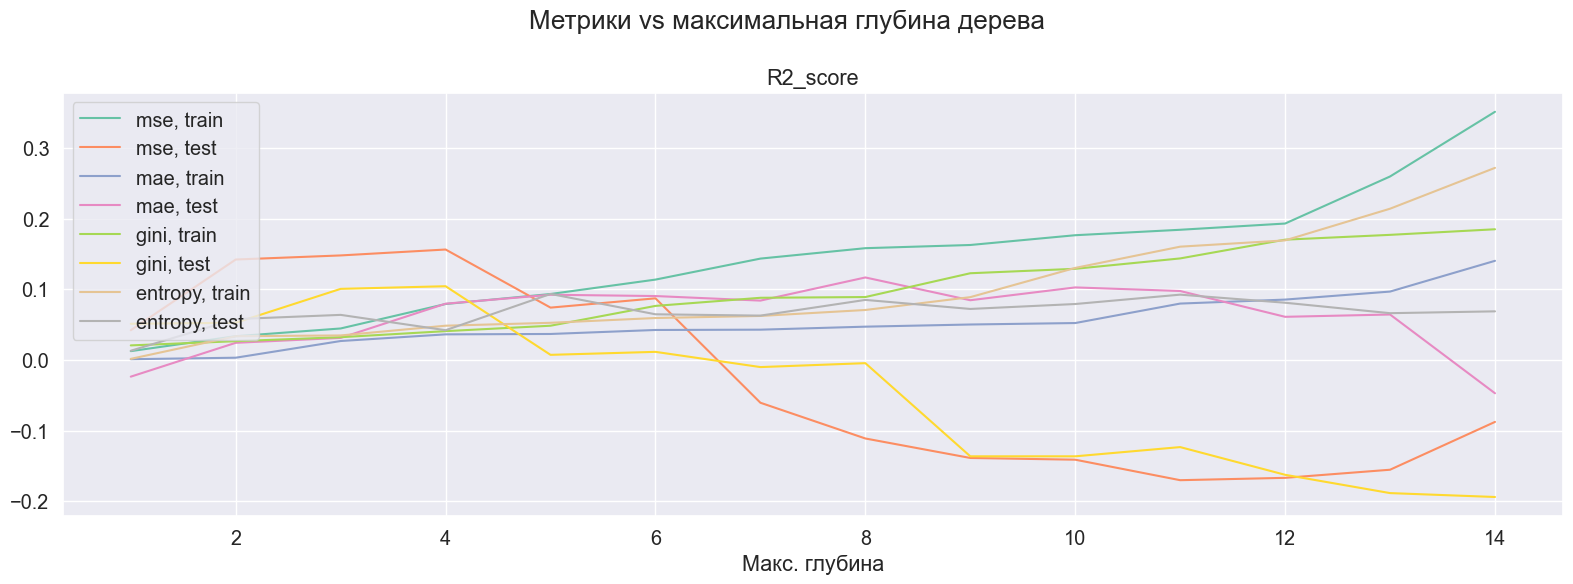

In [38]:
r2_scores = {c:{'train':[],'test':[]} for c in criterion_names}
depths = np.arange(1,15)
for criterion in criterion_names:
    for depth in depths:
        dt = DecisionTreeRegressor(criterion=criterion, min_samples_split=4, max_depth=depth)
        dt.fit(X_train, y_train)
        for domain, X_domain, y_domain in zip(['train','test'], [X_train,X_test], [y_train,y_test]):
            y_pred = dt.predict(X_domain)
            r2_scores[criterion][domain].append(r2_score(y_domain, y_pred))

fig, axs = plt.subplots(1, 1, figsize=(16,6))
fig.suptitle('Метрики vs максимальная глубина дерева')
for ax, metrics, title in zip([axs], [r2_scores], ['R2_score']):
    ax.set_title(title)
    ax.set_xlabel('Макс. глубина')
    for k1 in criterion_names:
        for k2 in ['train','test']:
            sns.lineplot(x=depths, y=metrics[k1][k2], label=f'{k1}, {k2}', ax=ax)
fig.tight_layout()
plt.show()

Сделайте вывод, в котором объясните, почему графики получились такими.

Скорее всего, вы заметили, что дерево в этих экспериментах строится довольно медленно. Как можно ускорить его построение? Можно ли ускорить нахождение оптимального разбиения по некоторому вещественному признаку?

***Вывод.***
  
*Графики: с увеличением максимальной глубины дерева результаты на трейне улучшаются, а на тесте - ухудшаются. Значит, с ростом max_depth модель начинает переобучаться. Отрицательные значения r2_score (оранжевая и желтая линии) вообще говорят о том, что модель в тех случаях справлялась хуже, чем горизонтальная линия (т.е. возникает сильное переобучение)*  
  
*Действительно, ячейка с построением выполнялась около 17 минут. Построение дерева можно ускорить, если сузить перебор порогов (например, перебирать не все, а с бОльшим шагом, или уменьшать шаг при приближении к локальным оптимумам). Либо вообще можно реализовать дерево решений на c++, а из питона только вызывать его. Еще можно попробовать распараллелить построение дерева с помощью многопоточности*  

**2. Задача классификации, работа с пропусками**

В этом пункте вам предстоит освоиться с обработкой пропусков в решающих деревьях, реализованной ранее.

Рассмотрим датасет, в котором часть данных пропущена. В качестве примера возьмём датасет https://archive.ics.uci.edu/ml/datasets/Adult для определения категории дохода работников, по таким признакам, как возраст, образование, специальность, класс работы, пол, кол-во отрабатываемых часов в неделю и некоторым другим.

In [40]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education1', 'education2', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 
    'capital-loss', 'hours-per-week', 'native-country', 'target'
]

Поскольку предсказание в дереве на данных с пропусками часто занимает сильно больше времени, чем в случае отсутствия пропусков (так как часто приходится спускаться разу в 2 поддерева), то для экономии времени сократим датасет, взяв из него только первые 10000 строк данных.

In [41]:
from ucimlrepo import fetch_ucirepo 
adult = fetch_ucirepo(id=2) 
adult_df = pd.concat([adult.data.features, adult.data.targets], axis=0)
adult_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,NaN
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,NaN
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,NaN
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,NaN
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,NaN


In [42]:
adult_df = adult_df[:10000]  # pd.read_csv('adult.data', header=None)[:10000]
adult_df.columns = column_names
target = adult_df['target'] == ' >50K'
adult_df = adult_df.drop(['target'], axis=1)
adult_df.head()

,age,workclass,fnlwgt,education1,education2,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


Предобработаем датасет, заменив категориальные признаки one-hot векторами.

In [43]:
adult_df = pd.get_dummies(adult_df)
adult_df.head()

,age,fnlwgt,education2,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39.0,77516.0,13.0,2174.0,0.0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50.0,83311.0,13.0,0.0,0.0,13.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38.0,215646.0,9.0,0.0,0.0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53.0,234721.0,7.0,0.0,0.0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28.0,338409.0,13.0,0.0,0.0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Поскольку все пропущенные значения относились к категориальным признакам и помечались в датасете знаком `?`, то для каждого категориального признака `feature` исходного датасета надо выполнить следующую процедуру: рассмотреть признак `feature_?` нового датасета и для всех строк, для которых выполнено `feature_?=1`, значениях всех признаков с префиксом `feature` установить в `None`. 

In [44]:
all_indices = np.arange(adult_df.shape[0])
for feature in column_names:
    if f'{feature}_ ?' in adult_df.columns:
        none_indices = all_indices[adult_df[f'{feature}_ ?'] == 1]
        for dummy_feature in adult_df.columns:
            if not dummy_feature.startswith(f'{feature}_ '):
                continue
            if dummy_feature != f'{feature}_ ?':
                adult_df[dummy_feature][none_indices] = None
        adult_df = adult_df.drop(f'{feature}_ ?', axis=1)

Посмотрим на распределение пропущенных значений по признакам.

In [45]:
np.sum(adult_df.isnull(), axis=0)

age                               0
fnlwgt                            0
education2                        0
capital-gain                      0
capital-loss                      0
                                 ..
native-country_Thailand           0
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
Length: 107, dtype: int64

Разобьём данные на обучающую и тестовую выборки в отношении 3:1.

In [46]:
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(adult_df, target, random_state=777)

При помощи кросс-валидации найдём оптимальные гиперпараметры `max_depth` и `min_samples_split` для каждого из критериев разбиения деревьев для классификации.

In [57]:
gridsearch = GridSearchCV(
    estimator = DecisionTreeRegressor(),
    param_grid = {
        'criterion': criterion_names,
        'max_depth': np.arange(3,15),
        'min_samples_split': np.arange(2,5)},
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    scoring = make_scorer(accuracy_score)
)
gridsearch.fit(X_adult_train, y_adult_train)  # важно: scaler для деревьев не нужен
results = pd.DataFrame(gridsearch.cv_results_)

c:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "c:\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "c:\Python39\lib\site-packages\sklearn\utils\_response.py", line 238, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "C:\Users\aikru\AppData\Local\Te

KeyboardInterrupt: 

In [ ]:
print("Лучшие параметры:")
for k,v in gridsearch.best_params_.items():
    print(f'{k}: {v}')

print("\nЛучшие метрики на тесте:")
print(f"accuracy: {results.loc[gridsearch.best_index_, 'mean_test_score']:.3f}")

Постройте графики зависимости `accuracy` от максимальной глубины дерева на обучающей и тестовой выборке, аналогично тому как сделали в пунтке с регресиией для `r2-score`.

In [ ]:
accuracies = {c:{'train':[],'test':[]} for c in criterion_names}
depths = np.arange(1,15)
for criterion in criterion_names:
    for depth in depths:
        dt = DecisionTreeRegressor(criterion=criterion, min_samples_split=4, max_depth=depth)
        dt.fit(X_train, y_train)
        for domain, X_domain, y_domain in zip(['train','test'], [X_train,X_test], [y_train,y_test]):
            y_pred = dt.predict(X_domain)
            accuracies[criterion][domain].append(accuracy_score(y_domain, y_pred))

fig, axs = plt.subplots(1, 1, figsize=(16,6))
fig.suptitle('Метрики vs максимальная глубина дерева')
for ax, metrics, title in zip([axs], [accuracies], ['Accuracy']):
    ax.set_title(title)
    ax.set_xlabel('Макс. глубина')
    # ax.set_ylim((0.8,1.02))
    for k1 in criterion_names:
        for k2 in ['train','test']:
            sns.lineplot(x=depths, y=metrics[k1][k2], label=f'{k1}, {k2}', ax=ax)
fig.tight_layout()
plt.show()

Сделайте выводы. Почему графики получились такими? Как соотносятся оптимальные значения параметров на обучающей и на тестовой выборках?

***Вывод.***

*Работает ужасно медленно( к сожалению, ячейка с кросс-валидацией не успела прогнаться повторно*  
*Аналогично, с увеличением максимальной глубины дерева результаты на трейне улучшаются, а на тесте - ухудшаются. Значит, с ростом max_depth модель начинает переобучаться*  

*В этой задаче удалось реализовать деревья решений (для задач классификации и регрессии), а также проверить их работу на практике*